In [ ]:
!pip install mendelai-brat-parser
!pip install stc

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

nltk.download('universal_tagset')

  Created wheel for mendelai-brat-parser: filename=mendelai_brat_parser-0.0.11-py3-none-any.whl size=4945 sha256=40bb7738b26397a2c8747d3a237c965b52aad7e2f173d07d8d664607ec59dfd8
  Stored in directory: /root/.cache/pip/wheels/7e/40/73/4f68f4fa597be33e250400cd56c28c85862b1cba5b3c7c33f1
Successfully built mendelai-brat-parser
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import regex as re
from collections import Counter
import math

from google.colab import files
import zipfile
import glob

import xml.etree.ElementTree as ET
from brat_parser import get_entities_relations_attributes_groups

from nltk.tag import pos_tag, map_tag

from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import spacy
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

from brat_parser import get_entities_relations_attributes_groups

import gensim
import gensim.downloader as api
from gensim.models import Word2Vec

from sklearn.metrics import classification_report
from keras.utils.np_utils import to_categorical

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from stc import SparseTensorClassifier
from scipy.stats import spearmanr

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, recall_score, precision_score

In [ ]:
# Neural network imports.
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Input, Dropout
from keras.layers import TimeDistributed
from keras.layers import Concatenate
from keras.layers import LSTM, GRU, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Model, Input

# **Relations Dataframes**

In [ ]:
# Import the datataset, created in a previous moment, (essay_relation_dataset.csv) 
# containing an entry for each relation of the Stab and Gurevych dataset.
# Each entry is composed as: 
# (type,doc_id,supporting_text,supporting_type,supporting_sentence_id,supporting_section_length,supported_text,supported_type,supported_sentence_id,supported_section_length)
# where type is the relation tipe (attack, support, none).
# supporting and supported refer to the two section of the corpus that are in a relation:
# text refers to their original texts, type if they are a premise or a claim, the length to the number of sentences in the arg. section after the first one,  and sentence_id
# indicates the position in the corpus of the sentence that contains them.
print('\nImport essay_relation_dataset.csv\n')
uploaded = files.upload()


Import essay_relation_dataset.csv



Saving essay_relation_dataset.csv to essay_relation_dataset.csv


In [ ]:
# Import the datataset created in a previous moment (microtext_relation_dataset.csv) 
# containing an entry for each relation of the arg-microtext dataset.
# Each entry is composed as: 
# (doc_id,supporting_text,supporting_sentence_id,supporting_section_length,supported_text,supported_sentence_id,supported_section_length)
# where type is the relation tipe (attack, support, none).
# supporting and supported refer to the two section of the corpus that are in a relation:
# text refers to their original texts, the length to the number of sentences in the arg. section after the first one,  and sentence_id
# indicates the position in the corpus of the sentence that contains them.
print('\nImport microtext_relation_dataset.csv\n')
uploaded = files.upload()


Import microtext_relation_dataset.csv



Saving microtext_relation_dataset.csv to microtext_relation_dataset.csv


In [ ]:
# Stab and Gurevych dataset.

# Import the statistics and positions information of the sentences to classify.
print('\nImport relation_statistic.csv\n')
upload = files.upload()

# Import the BOW of the labeled named entity of the sentences to classify.
print('\nImport relation_named_entity_BOW.csv\n')
upload = files.upload()

# Import the BOW of the sentences to classify.
print('\nImport relation_BOW.csv\n')
upload = files.upload()

# Import the BOW of the simplyed POS of the sentences to classify.
print('\nImport relation_simple_POS.csv\n')
upload = files.upload()

# Import the BOW of the POS of the sentences to classify.
print('\nImport relation_POS.csv\n')
upload = files.upload()

# Import the BOW of the dependency tag of the sentences to classify.
print('\nImport relation_dependency.csv\n')
upload = files.upload()

# Import the statistic relative to the tree of the dependency tag of the sentences to classify.
print('\nImport relation_dependency_tree_stat.csv\n')
upload = files.upload()

# Import the BOW for secific n-grams of the sentences to classify.
print('\nImport relation_imported_ngram.csv\n')
upload = files.upload()

# Import the remaining statistics of the sentences to classify.
print('\nImport relation_remaining_stat.csv\n')
upload = files.upload()


Import relation_statistic.csv




Import relation_named_entity_BOW.csv




Import relation_BOW.csv




Import relation_simple_POS.csv




Import relation_POS.csv




Import relation_dependency.csv




Import relation_dependency_tree_stat.csv




Import relation_imported_ngram.csv




Import relation_remaining_stat.csv



In [ ]:
# Import the feature relative to the labeled named entity of the sentences not to use.
# (drop_claim_premise_named_entity.txt).
print('\nImport drop_relation_named_entity.txt\n')
upload = files.upload()

# Import the feature relative to the simple POS tag of the sentences not to use.
# (drop_claim_premise_named_entity.txt).
print('\nImport drop_relation_simple_POS.txt\n')
upload = files.upload()


Import drop_relation_named_entity.txt




Import drop_relation_simple_POS.txt



In [ ]:
# Microtext dataset.

# Import the statistics and positions information of the sentences to classify.
print('\nImport microtext_relation_statistic.csv\n')
upload = files.upload()

# Import the BOW of the labeled named entity of the sentences to classify.
print('\nImport microtext_relation_named_entity_BOW.csv\n')
upload = files.upload()

# Import the BOW of the sentences to classify.
print('\nImport microtext_relation_BOW.csv\n')
upload = files.upload()

# Import the BOW of the simplyed POS of the sentences to classify.
print('\nImport microtext_relation_simple_POS.csv\n')
upload = files.upload()

# Import the BOW of the POS of the sentences to classify.
print('\nImport microtext_relation_POS.csv\n')
upload = files.upload()

# Import the BOW of the dependency tag of the sentences to classify.
print('\nImport microtext_relation_dependency.csv\n')
upload = files.upload()

# Import the statistic relative to the tree of the dependency tag of the sentences to classify.
print('\nImport microtext_relation_dependency_tree_stat.csv\n')
upload = files.upload()

# Import the BOW for secific n-grams of the sentences to classify.
print('\nImport microtext_relation_imported_ngram.csv\n')
upload = files.upload()

# Import the remaining statistics of the sentences to classify.
print('\nImport microtext_relation_remaining_stat.csv\n')
upload = files.upload()


Import microtext_relation_statistic.csv




Import microtext_relation_named_entity_BOW.csv




Import microtext_relation_BOW.csv




Import microtext_relation_simple_POS.csv




Import microtext_relation_POS.csv




Import microtext_relation_dependency.csv




Import microtext_relation_dependency_tree_stat.csv




Import microtext_relation_imported_ngram.csv




Import microtext_relation_remaining_stat.csv



In [ ]:
# Import the original Stab and Gurevych dataset (2017 version).

uploaded = files.upload()

Saving arg-microtexts-master.zip to arg-microtexts-master.zip


In [ ]:
# Import the microtexts dataset.

uploaded = files.upload()

Saving ArgumentAnnotatedEssays-2.0.zip to ArgumentAnnotatedEssays-2.0.zip


In [ ]:
# The imported dataset is here directly used.

microtext_relation_ann_dataset=pd.read_csv('microtext_relation_dataset.csv')

In [ ]:
microtext_relation_ann_dataset.head()

,type,doc_id,supporting_text,supporting_sentence_id,supported_text,supported_sentence_id
0,attacks,0,"Yes, it's annoying and cumbersome to separate ...",0,We Berliners should take the chance and become...,3
1,supports,0,Three different bin bags stink away in the kit...,1,"Yes, it's annoying and cumbersome to separate ...",0
2,supports,1,One can hardly move in Friedrichshain or Neukö...,4,Higher fines are therefore the right measure a...,6
3,supports,1,And when bad luck does strike and you step int...,5,Higher fines are therefore the right measure a...,6
4,attacks,1,"Of course, first they'd actually need to be ca...",7,Higher fines are therefore the right measure a...,6


In [ ]:
number_documents=len(list(set(microtext_relation_ann_dataset['doc_id'].tolist())))

In [ ]:
# The imported dataset is here directly used.
# MajorClaim have been removed from the argumentations in the imported dataset (they don't have labeled relations).

relation_ann_dataset=pd.read_csv('essay_relation_dataset.csv')

relation_ann_dataset=relation_ann_dataset.drop(['supporting_type', 'supported_type'], axis=1)

In [ ]:
relation_ann_dataset.head()

,type,doc_id,supporting_text,supporting_sentence_id,supporting_section_length,supported_text,supported_sentence_id,supported_section_length
0,supports,0,What we acquired from team work is not only ho...,5,0,"through cooperation, children can learn about ...",4,0
1,supports,0,"During the process of cooperation, children ca...",6,0,"through cooperation, children can learn about ...",4,0
2,supports,0,All of these skills help them to get on well w...,7,0,"through cooperation, children can learn about ...",4,0
3,supports,0,the significance of competition is that how to...,8,0,competition makes the society more effective,9,0
4,supports,0,when we consider about the question that how t...,10,0,"without the cooperation, there would be no vic...",14,0


In [ ]:
# The Microtext dataset.

relation_microtext_dataset=pd.read_csv('microtext_relation_dataset.csv')

In [ ]:
relation_microtext_dataset.head()

,type,doc_id,supporting_text,supporting_sentence_id,supported_text,supported_sentence_id
0,attacks,0,"Yes, it's annoying and cumbersome to separate ...",0,We Berliners should take the chance and become...,3
1,supports,0,Three different bin bags stink away in the kit...,1,"Yes, it's annoying and cumbersome to separate ...",0
2,supports,1,One can hardly move in Friedrichshain or Neukö...,4,Higher fines are therefore the right measure a...,6
3,supports,1,And when bad luck does strike and you step int...,5,Higher fines are therefore the right measure a...,6
4,attacks,1,"Of course, first they'd actually need to be ca...",7,Higher fines are therefore the right measure a...,6


# **Stab Gurevych dataset**

In [ ]:
# Function to extract zip file.
# Takes in input the path to the zip file (path_zip) and the one to store the destination directory (path_destination).

def extract_zip(path_zip,path_destination):
  with zipfile.ZipFile(path_zip, 'r') as zip_ref:
    zip_ref.extractall(path_destination)


In [ ]:
# Extract zip file (two zip files one inside the other).

extract_zip('ArgumentAnnotatedEssays-2.0.zip','ArgumentAnnotatedEssays-2.0')

extract_zip('ArgumentAnnotatedEssays-2.0/ArgumentAnnotatedEssays-2.0/brat-project-final.zip','ArgumentAnnotatedEssays')

## **Create and visualize the required Dataframe**

In [ ]:
# Extract the list of text files of the essays in the dataset.
txt_files = sorted(glob.glob("ArgumentAnnotatedEssays/brat-project-final/essay*.txt"))

# Extract the list of text files of the essays in the dataset.
ann_files = sorted(glob.glob("ArgumentAnnotatedEssays/brat-project-final/essay*.ann"))

In [ ]:
# List of text files of the essays.
txt_files[0:5]

['ArgumentAnnotatedEssays/brat-project-final/essay001.txt',
 'ArgumentAnnotatedEssays/brat-project-final/essay002.txt',
 'ArgumentAnnotatedEssays/brat-project-final/essay003.txt',
 'ArgumentAnnotatedEssays/brat-project-final/essay004.txt',
 'ArgumentAnnotatedEssays/brat-project-final/essay005.txt']

In [ ]:
# List of the annotated files of the essays.
ann_files[0:5]

['ArgumentAnnotatedEssays/brat-project-final/essay001.ann',
 'ArgumentAnnotatedEssays/brat-project-final/essay002.ann',
 'ArgumentAnnotatedEssays/brat-project-final/essay003.ann',
 'ArgumentAnnotatedEssays/brat-project-final/essay004.ann',
 'ArgumentAnnotatedEssays/brat-project-final/essay005.ann']

In [ ]:
# Transfor the ann files into four dictionaries.
ann_disctionaries=[get_entities_relations_attributes_groups(file) for file in ann_files]

# Transform the first dictionary (entities) obtained from each ann file into a dataset.
essay_ann_datasets = [pd.DataFrame.from_dict(entities, orient='index') for entities,_,_,_ in ann_disctionaries]

In [ ]:
# Sort the lists composed of a (entity) dataset for each essay.
essay_ann_datasets=[dataset.sort_values(by='span', key=lambda col: col.map(lambda x: x[0][0])) for dataset in essay_ann_datasets]  

# Add a coloumn into the dataset that identifies the document
for i in range(len(essay_ann_datasets)):
  essay_ann_datasets[i].insert(0,'doc_id',i)

# Create a common dataset
essay_argument_dataset = pd.concat(essay_ann_datasets)

In [ ]:
# Sobstitue the values in the "span" feature (substitute each tuple with its first inner tuple)
for i in range(len(essay_argument_dataset.index)):
  essay_argument_dataset['span'][i]=essay_argument_dataset['span'][i][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
essay_argument_dataset.head()

,doc_id,id,type,span,text
T1,0,T1,MajorClaim,"(503, 575)",we should attach more importance to cooperatio...
T3,0,T3,Claim,"(591, 714)","through cooperation, children can learn about ..."
T4,0,T4,Premise,"(716, 851)",What we acquired from team work is not only ho...
T5,0,T5,Premise,"(853, 1086)","During the process of cooperation, children ca..."
T6,0,T6,Premise,"(1088, 1191)",All of these skills help them to get on well w...


## **Word list of the Corpus**

In [ ]:
# List of texts of the essays
files_text=[open(file).read() for file in txt_files]

In [ ]:
# Get the start and finish points of each argumentative section of each of the text.
# Also get the type of each argumentative section.
# This points are indicated in the "span" coloumn of the Dataframe of the annotation.

sorted_span=[list(essay_argument_dataset.loc[essay_argument_dataset['doc_id'] == i,['span','type']].values) for i in range(len(ann_files))]

In [ ]:
sorted_span[0]

[array([(503, 575), 'MajorClaim'], dtype=object),
 array([(591, 714), 'Claim'], dtype=object),
 array([(716, 851), 'Premise'], dtype=object),
 array([(853, 1086), 'Premise'], dtype=object),
 array([(1088, 1191), 'Premise'], dtype=object),
 array([(1212, 1301), 'Premise'], dtype=object),
 array([(1332, 1376), 'Claim'], dtype=object),
 array([(1387, 1492), 'Premise'], dtype=object),
 array([(1549, 1846), 'Premise'], dtype=object),
 array([(1927, 1992), 'Claim'], dtype=object),
 array([(2154, 2231), 'MajorClaim'], dtype=object)]

In [ ]:
# Tranform the couples of points ((start,end) of each section) to a list (separator of different section).

span_points=[]

for i in range(len(sorted_span)):
  list_points=[sep for sub in sorted_span[i] for sep in sub[0]]
  # Insert starting point of the text
  list_points.insert(0,0)
  list_points.append(len(files_text[i]))
  span_points.append(list_points)

In [ ]:
span_points[0]

[0,
 503,
 575,
 591,
 714,
 716,
 851,
 853,
 1086,
 1088,
 1191,
 1212,
 1301,
 1332,
 1376,
 1387,
 1492,
 1549,
 1846,
 1927,
 1992,
 2154,
 2231,
 2232]

In [ ]:
# Separate the texts at the point indicated for the different sections

split_text=[]

for z in range(len(files_text)):
  split_text.append([files_text[z][i: j] for i, j in zip(span_points[z], span_points[z][1:])])

In [ ]:
split_text[0][0:10]

["Should students be taught to compete or to cooperate?\n\nIt is always said that competition can effectively promote the development of economy. In order to survive in the competition, companies continue to improve their products and service, and as a result, the whole society prospers. However, when we discuss the issue of competition or cooperation, what we are concerned about is not the whole society, but the development of an individual's whole life. From this point of view, I firmly believe that ",
 'we should attach more importance to cooperation during primary education',
 '.\nFirst of all, ',
 'through cooperation, children can learn about interpersonal skills which are significant in the future life of all students',
 '. ',
 'What we acquired from team work is not only how to achieve the same goal with others but more importantly, how to get along with others',
 '. ',
 'During the process of cooperation, children can learn about how to listen to opinions of others, how to com

In [ ]:
# Get the list of the words of each essay.

X_essay_word_list=[]

for i in range(len(split_text)):
  
  essay_word_list=[]

  # Remove title from essay considered (splitted_text)
  no_title=[re.sub(r".*\n\n","",text) for text in split_text[i]]

  for section in no_title:

    # Divide the text into token.
    seq=nltk.word_tokenize(section.lower())

    essay_word_list+=seq

  X_essay_word_list.append(essay_word_list)

In [ ]:
X_essay_word_list[0][80:120]

['i',
 'firmly',
 'believe',
 'that',
 'we',
 'should',
 'attach',
 'more',
 'importance',
 'to',
 'cooperation',
 'during',
 'primary',
 'education',
 '.',
 'first',
 'of',
 'all',
 ',',
 'through',
 'cooperation',
 ',',
 'children',
 'can',
 'learn',
 'about',
 'interpersonal',
 'skills',
 'which',
 'are',
 'significant',
 'in',
 'the',
 'future',
 'life',
 'of',
 'all',
 'students',
 '.',
 'what']

## **Find out sentences list**

In [ ]:
# Get the list of all the sentences.

sentence_list=[]

# Get the list of the id of the essay for each of the sentences of the corpus.
essay_id_list=[]


for essay_id in range(len(X_essay_word_list)):
  sentence=""

  for word_id in range(len(X_essay_word_list[essay_id])):
    
    word=X_essay_word_list[essay_id][word_id]

    # Add to the sentence every word that is not a simple \n or the end of the sentence (".").
    if not ( word=="." ):
      sentence+=word+" "
          
    # . is the end of the sentence.       
    if word in [".","?","!"] and ( not sentence==""):
      sentence_list.append(sentence)
      essay_id_list.append(essay_id)

      sentence=""

  if not (sentence==""):
      sentence_list.append(sentence)
      essay_id_list.append(essay_id)

In [ ]:
len(sentence_list)

6738

## **Select the sections to classify and the labels**

In [ ]:
# Get the list of the words of each argumentative section that is part of a 
# relation.

# List of the argumentative sections in the relations imported.
X_supporting_section_list=[]
X_supported_section_list=[]

# List of the sentences before each argumentative sections in the relations imported.
X_supporting_section_list_before=[]
X_supported_section_list_before=[]

# List of the sentences after each argumentative sections in the relations imported.
X_supporting_section_list_after=[]
X_supported_section_list_after=[]

for relation in relation_ann_dataset.itertuples():

  supporting=""
  supported=""

  supporting_sequence=relation.supporting_text
  supported_sequence=relation.supported_text

  supporting_sentence_id=relation.supporting_sentence_id
  supported_sentence_id=relation.supported_sentence_id

  supporting_section_length=relation.supporting_section_length
  supported_section_length=relation.supported_section_length

  # Divide the sections into token.
  supporting_seq_word=nltk.word_tokenize(supporting_sequence.lower())
  supported_seq_word=nltk.word_tokenize(supported_sequence.lower())

  for word in supporting_seq_word:
    supporting+=word+" "

  for word in supported_seq_word:
    supported+=word+" "

  # Concatenate the sentences before and atfer the ones that contain the argumentation
  # separately.
  # If the sentences don't end with a "?" or a "!", add a period (".") at the end;
  # the sentences are stored without the periods.
  supporting_sentence=sentence_list[supporting_sentence_id]

  for j in range(supporting_section_length):
    if not (supporting_sentence[-2]=='?' or supporting_sentence[-2]=='!'):
      supporting_sentence+=". "+sentence_list[supporting_sentence_id+j+1]
    else:
      supporting_sentence+=sentence_list[supporting_sentence_id+j+1]

  supported_sentence=sentence_list[supported_sentence_id]

  for j in range(supported_section_length):
    if not (supported_sentence[-2]=='?' or supported_sentence[-2]=='!'):
      supported_sentence+=". "+sentence_list[supported_sentence_id+j+1]
    else:
      supported_sentence+=sentence_list[supported_sentence_id+j+1]    

  # Get the parts of the sentence containing the argumentative section before
  # and after the section.
  supporting_before,supporting_after=supporting_sentence.split(supporting)
  supported_before,supported_after=supported_sentence.split(supported)

  # If the section it isn't in the first sentence of an essay attach to the
  # already retrieved preciding section the entire sentence before the one 
  # containing the section. 

  if (supporting_sentence_id>0) and (essay_id_list[supporting_sentence_id]==essay_id_list[supporting_sentence_id-1]):
    sentence_before=sentence_list[supporting_sentence_id-1]
    if not (sentence_before[-2]=='?' or sentence_before[-2]=='!'):
      supporting_before=sentence_before+". "+supporting_before
    else:
      supporting_before=sentence_before+" "+supporting_before


  if (supported_sentence_id>0) and (essay_id_list[supported_sentence_id]==essay_id_list[supported_sentence_id-1]):
    sentence_before=sentence_list[supported_sentence_id-1]
    if not (sentence_before[-2]=='?' or sentence_before[-2]=='!'):
      supported_before=sentence_before+". "+supported_before
    else:
      supported_before=sentence_before+" "+supported_before 

  # If the section it isn't in the last sentence of an essay attach to the
  # already retrieved following section the entire sentence after the one 
  # containing the section. 

  if (supporting_sentence_id<len(sentence_list)-1) and (essay_id_list[supporting_sentence_id]==essay_id_list[supporting_sentence_id+1]):
    sentence_after=sentence_list[supporting_sentence_id+supporting_section_length+1]
    if len(supporting_after)>1 and (supporting_after[-2]=='?' or supporting_after[-2]=='!'):
      supporting_after=supporting_after+" "+sentence_after
    else:
      supporting_after=supporting_after+". "+sentence_after

  if (supported_sentence_id<len(sentence_list)-1) and (essay_id_list[supported_sentence_id]==essay_id_list[supported_sentence_id+1]):
    sentence_after=sentence_list[supported_sentence_id+supported_section_length+1]
    if len(supported_after)>1 and (supported_after[-2]=='?' or supported_after[-2]=='!'):
      supported_after=supported_after+" "+sentence_after
    else:
      supported_after=supported_after+". "+sentence_after  

  X_supporting_section_list.append(supporting)
  X_supported_section_list.append(supported)
  X_supporting_section_list_before.append(supporting_before)
  X_supported_section_list_before.append(supported_before)
  X_supporting_section_list_after.append(supporting_after)
  X_supported_section_list_after.append(supported_after)

In [ ]:
X_supporting_section_list[:5]

['what we acquired from team work is not only how to achieve the same goal with others but more importantly , how to get along with others ',
 'during the process of cooperation , children can learn about how to listen to opinions of others , how to communicate with others , how to think comprehensively , and even how to compromise with other team members when conflicts occurred ',
 'all of these skills help them to get on well with other people and will benefit them for the whole life ',
 'the significance of competition is that how to become more excellence to gain the victory ',
 'when we consider about the question that how to win the game , we always find that we need the cooperation ']

In [ ]:
X_supporting_section_list_before[:5]

['first of all , through cooperation , children can learn about interpersonal skills which are significant in the future life of all students . ',
 'what we acquired from team work is not only how to achieve the same goal with others but more importantly , how to get along with others . ',
 'during the process of cooperation , children can learn about how to listen to opinions of others , how to communicate with others , how to think comprehensively , and even how to compromise with other team members when conflicts occurred . ',
 'all of these skills help them to get on well with other people and will benefit them for the whole life . on the other hand , ',
 'hence it is always said that competition makes the society more effective . however , ']

In [ ]:
X_supporting_section_list_after[:5]

['. during the process of cooperation , children can learn about how to listen to opinions of others , how to communicate with others , how to think comprehensively , and even how to compromise with other team members when conflicts occurred ',
 '. all of these skills help them to get on well with other people and will benefit them for the whole life ',
 '. on the other hand , the significance of competition is that how to become more excellence to gain the victory ',
 '. hence it is always said that competition makes the society more effective ',
 '. the greater our goal is , the more competition we need ']

In [ ]:
X_supported_section_list[:5]

['through cooperation , children can learn about interpersonal skills which are significant in the future life of all students ',
 'through cooperation , children can learn about interpersonal skills which are significant in the future life of all students ',
 'through cooperation , children can learn about interpersonal skills which are significant in the future life of all students ',
 'competition makes the society more effective ',
 'without the cooperation , there would be no victory of competition ']

In [ ]:
X_supported_section_list_before[:5]

['from this point of view , i firmly believe that we should attach more importance to cooperation during primary education . first of all , ',
 'from this point of view , i firmly believe that we should attach more importance to cooperation during primary education . first of all , ',
 'from this point of view , i firmly believe that we should attach more importance to cooperation during primary education . first of all , ',
 'on the other hand , the significance of competition is that how to become more excellence to gain the victory . hence it is always said that ',
 'the winner is the athlete but the success belongs to the whole team . therefore ']

In [ ]:
X_supported_section_list_after[:5]

['. what we acquired from team work is not only how to achieve the same goal with others but more importantly , how to get along with others ',
 '. what we acquired from team work is not only how to achieve the same goal with others but more importantly , how to get along with others ',
 '. what we acquired from team work is not only how to achieve the same goal with others but more importantly , how to get along with others ',
 '. however , when we consider about the question that how to win the game , we always find that we need the cooperation ',
 ". consequently , no matter from the view of individual development or the relationship between competition and cooperation we can receive the same conclusion that a more cooperative attitudes towards life is more profitable in one 's success "]

In [ ]:
X_supported_word_list_after=[nltk.word_tokenize(section) for section in X_supported_section_list_after]
X_supporting_word_list_after=[nltk.word_tokenize(section) for section in X_supporting_section_list_after]
X_supported_word_list_before=[nltk.word_tokenize(section) for section in X_supported_section_list_before]
X_supporting_word_list_before=[nltk.word_tokenize(section) for section in X_supporting_section_list_before]
X_supported_word_list=[nltk.word_tokenize(section) for section in X_supported_section_list]
X_supporting_word_list=[nltk.word_tokenize(section) for section in X_supporting_section_list]

In [ ]:
Y_relation_type=relation_ann_dataset["type"].tolist()

Y_relation_type[:10]

['supports',
 'supports',
 'supports',
 'supports',
 'supports',
 'supports',
 'supports',
 'supports',
 'supports',
 'None']

In [ ]:
Y_relation_type_temp=[]

for rel in Y_relation_type:
  if rel=="supports":
    Y_relation_type_temp.append(1)
  else:
    if rel=="None":
      Y_relation_type_temp.append(0)
    else:
      Y_relation_type_temp.append(2)

Y_relation_type=Y_relation_type_temp

Y_relation_type[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]

In [ ]:
# Definition of the class weights to reduce the impact of the imbalance in the dataset.
class_weights={0: 1, 1: 1, 2:8}

## **Import sentences' statistic**

In [ ]:
# Create dataframe of the feature extracted until now over the statistic of the 
# related sentences in the text and their distance in the text.

sentence_stat_dataframe=pd.read_csv('relation_statistic.csv')

sentence_stat_dataframe.head()

,paragraph distance,position_in_essay_distance,length_sentence_ratio
0,0,-1,0.807692
1,0,-2,0.567568
2,0,-3,1.000000
3,0,1,0.631579
4,0,4,0.523810


### **LNE**

In [ ]:
# Read the files containing the statistic feature to remove.
stat_data=open("drop_relation_named_entity.txt").read()

stat_data=stat_data.split("-")

stat_data=stat_data[:-1]

stat_data

['event',
 'fac',
 'language',
 'loc',
 'money',
 'percent',
 'person',
 'product',
 'quantity',
 'work_of_art']

In [ ]:
# BOW of labeled named entity of the sentence.
temp_sentence_stat_dataframe=pd.read_csv('relation_named_entity_BOW.csv')

temp_sentence_stat_dataframe=temp_sentence_stat_dataframe.drop(columns=stat_data)

sentence_stat_dataframe=pd.concat([sentence_stat_dataframe,temp_sentence_stat_dataframe], axis=1)

sentence_stat_dataframe.head()

,paragraph distance,position_in_essay_distance,length_sentence_ratio,cardinal,date,gpe,norp,ordinal,org,time
0,0,-1,0.807692,0,0,0,0,0,0,0
1,0,-2,0.567568,0,0,0,0,0,0,0
2,0,-3,1.000000,0,0,0,0,0,0,0
3,0,1,0.631579,0,0,0,0,0,0,0
4,0,4,0.523810,0,0,0,0,0,0,0


### **BOW**

In [ ]:
temp_sentence_stat_dataframe=pd.read_csv('relation_BOW.csv')

sentence_stat_dataframe=pd.concat([sentence_stat_dataframe,temp_sentence_stat_dataframe], axis=1)

sentence_stat_dataframe.head()

,paragraph distance,position_in_essay_distance,length_sentence_ratio,cardinal,date,gpe,norp,ordinal,org,time,','','low,'ll,'s,'social,",",.,15,20th,21st,30,20,3,:,a,``,;,abandon,abbreviation,ability,able,about,abroad,above,academic,access,accessed,accident,absolutely,absorb,accept,accepted,accompany,accordance,accordingly,accumulated,achieve,achieved,accuracy,accuse,achievement,acid,acquaintance,acquire,across,active,activity,actor,adapt
0,0,-1,0.807692,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,-2,0.567568,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,-3,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0.631579,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,4,0.523810,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **Simple POS**

In [ ]:
# Read the files containing the statistic feature to remove.
stat_data_simple_POS=open("drop_relation_simple_POS.txt").read()

stat_data_simple_POS=stat_data_simple_POS.split("-")

stat_data_simple_POS=stat_data_simple_POS[:-1]

stat_data_simple_POS

['num', 'x']

In [ ]:
# BOW of simple POS tag of the sentence.
temp_sentence_stat_dataframe=pd.read_csv('relation_simple_POS.csv')

temp_sentence_stat_dataframe=temp_sentence_stat_dataframe.drop(columns=stat_data_simple_POS)

sentence_stat_dataframe=pd.concat([sentence_stat_dataframe,temp_sentence_stat_dataframe], axis=1)

sentence_stat_dataframe.head()

,paragraph distance,position_in_essay_distance,length_sentence_ratio,cardinal,date,gpe,norp,ordinal,org,time,','','low,'ll,'s,'social,",",.,15,20th,21st,30,20,3,:,a,``,;,abandon,abbreviation,ability,able,about,abroad,above,academic,access,accessed,accident,absolutely,absorb,accept,accepted,accompany,accordance,accordingly,accumulated,achieve,achieved,accuracy,accuse,achievement,acid,acquaintance,acquire,across,active,activity,actor,adapt,.,adj,adp,adv,conj,det,noun,pron,prt,verb
0,0,-1,0.807692,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,4,1,0,1,5,0,0,3
1,0,-2,0.567568,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,5,1,0,1,5,0,0,3
2,0,-3,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,1,0,3,3,0,0,3
3,0,1,0.631579,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,3,0,0,3
4,0,4,0.523810,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,1,0,3,3,0,0,2


### **Final statistic dataframe**

In [ ]:
X_sentence_stat_dataframe=sentence_stat_dataframe.to_numpy()

X_sentence_stat_dataframe.shape

(6243, 70)

# **Microtext Dataset**

In [ ]:
# Function to extract zip file.
# Takes in input the path to the zip file (path_zip) and the one to store the destination directory (path_destination).

def extract_zip(path_zip,path_destination):
  with zipfile.ZipFile(path_zip, 'r') as zip_ref:
    zip_ref.extractall(path_destination)

In [ ]:
# Extract zip file.

extract_zip('arg-microtexts-master.zip','arg-microtexts-master')

## **Extract argumentative sections and their relations**

In [ ]:
# Extract the list of xml files containing the argumentative sections in the 
# dataset and their relations.

xml_files = sorted(glob.glob("arg-microtexts-master/arg-microtexts-master/corpus/en/micro_*.xml"))

In [ ]:
# List of xml files of the essays.
xml_files[0:5]

['arg-microtexts-master/arg-microtexts-master/corpus/en/micro_b001.xml',
 'arg-microtexts-master/arg-microtexts-master/corpus/en/micro_b002.xml',
 'arg-microtexts-master/arg-microtexts-master/corpus/en/micro_b003.xml',
 'arg-microtexts-master/arg-microtexts-master/corpus/en/micro_b004.xml',
 'arg-microtexts-master/arg-microtexts-master/corpus/en/micro_b005.xml']

In [ ]:
# Transform each xml file into the xml tree representation.

list_xml_tree_representation=[ET.parse(xml_file) for xml_file in xml_files]

# Than extract from each tree its root.

list_xml_root=[tree.getroot() for tree in list_xml_tree_representation]

In [ ]:
# list_argumentative_sections will contain the lists, for each document in the
# corpus, of its argumentative sections.
list_argumentative_sections=[]
# list_arg_section_id_in_document will contain the lists, for each document in
# the corpus, of the id that identify the sections inside the document.
list_arg_section_id_in_document=[]


for root_id in range(len(list_xml_root)):
  temp_list_argumentative_sections=[]
  temp_list_arg_section_id_in_document=[]
  new_temp_list_arg_section_id_in_document=[]
  for child in list_xml_root[root_id]:
    # The nodes tagged with 'edu' contains the text of the arg. section and an unique identifier in the document.
    if child.tag=='edu':
      temp_list_argumentative_sections.append(child.text)
      temp_list_arg_section_id_in_document.append(child.get('id'))
    # In the 'edge' nodes the original id of the sections (in src) are sobstitute with new ones (in trg).
    if (child.tag=='edge'):
      src=child.get('src')
      trg=child.get('trg')
      if src in temp_list_arg_section_id_in_document:
        new_temp_list_arg_section_id_in_document.append(trg)

  list_argumentative_sections.append(temp_list_argumentative_sections)
  list_arg_section_id_in_document.append(new_temp_list_arg_section_id_in_document)

In [ ]:
for i in range(len(list_argumentative_sections[0])):
  print("section {} in document {}: {}".format(list_arg_section_id_in_document[0][i],0,list_argumentative_sections[0][i]))

section a1 in document 0: Yes, it's annoying and cumbersome to separate your rubbish properly all the time.
section a2 in document 0: Three different bin bags stink away in the kitchen and have to be sorted into different wheelie bins.
section a3 in document 0: But still Germany produces way too much rubbish
section a4 in document 0: and too many resources are lost when what actually should be separated and recycled is burnt.
section a5 in document 0: We Berliners should take the chance and become pioneers in waste separation!


## **Extract sentences**

In [ ]:
# All the argumentative sections are contained in a single sentence.

# Get the list of all the sentences.
microtext_sentence_list=[]

# Get the list of the document containing each sentence(one element per sentence).
microtext_sentence_document=[]

for i in range(len(list_argumentative_sections)):
  sentence=""
  for j in range(len(list_argumentative_sections[i])):

    sentence+=list_argumentative_sections[i][j]

    # An argumentative section which ends a sentence has a '.' as last character.
    if sentence[-1] in ['.','!','?']:
      microtext_sentence_list.append(sentence)
      # Add an id of the document in which the sentence appear in the correspondent list.
      microtext_sentence_document.append(i)
      sentence=""

  if not (sentence==""):  
    microtext_sentence_list.append(sentence)
    # Add an id of the document in which the sentence appear in the correspondent list.
    microtext_sentence_document.append(i)
    sentence="" 

In [ ]:
microtext_sentence_list[:10]

["Yes, it's annoying and cumbersome to separate your rubbish properly all the time.",
 'Three different bin bags stink away in the kitchen and have to be sorted into different wheelie bins.',
 'But still Germany produces way too much rubbishand too many resources are lost when what actually should be separated and recycled is burnt.',
 'We Berliners should take the chance and become pioneers in waste separation!',
 'One can hardly move in Friedrichshain or Neukölln these days without permanently scanning the ground for dog dirt.',
 "And when bad luck does strike and you step into one of the many 'land mines' you have to painstakingly scrape the remains off your soles.",
 'Higher fines are therefore the right measure against negligent, lazy or simply thoughtless dog owners.',
 "Of course, first they'd actually need to be caught in the act by public order officers,but once they have to dig into their pockets, their laziness will sure vanish!",
 'Health insurance companies should not cove

In [ ]:
len(microtext_sentence_list)

450

## **Select the sections to classify and the labels**

In [ ]:
# Get the list of the words of each argumentative section that is part of a 
# relation.

# List of the argumentative sections in the relations imported.
X_microtext_supporting_section_list=[]
X_microtext_supported_section_list=[]

# List of the sentences before each argumentative sections in the relations imported.
X_microtext_supporting_section_list_before=[]
X_microtext_supported_section_list_before=[]

# List of the sentences after each argumentative sections in the relations imported.
X_microtext_supporting_section_list_after=[]
X_microtext_supported_section_list_after=[]

for relation in relation_microtext_dataset.itertuples():

  supporting_sequence=relation.supporting_text
  supported_sequence=relation.supported_text

  supporting_sentence_id=relation.supporting_sentence_id
  supported_sentence_id=relation.supported_sentence_id

  # Concatenate the sentences before and atfer the ones that contain the argumentation
  # separately.
  supporting_sentence=microtext_sentence_list[supporting_sentence_id]

  supported_sentence=microtext_sentence_list[supported_sentence_id] 

  # Get the parts of the sentence containing the argumentative section before
  # and after the section.
  supporting_before,supporting_after=supporting_sentence.split(supporting_sequence)
  supported_before,supported_after=supported_sentence.split(supported_sequence)

  # If the section it isn't in the first sentence of an essay attach to the
  # already retrieved preciding section the entire sentence before the one 
  # containing the section.
  if (supporting_sentence_id>0) and (microtext_sentence_document[supporting_sentence_id]==microtext_sentence_document[supporting_sentence_id-1]):
    supporting_before=microtext_sentence_list[supporting_sentence_id-1]+" "+supporting_before

  if (supported_sentence_id>0) and (microtext_sentence_document[supporting_sentence_id]==microtext_sentence_document[supporting_sentence_id-1]):
    supported_before=microtext_sentence_list[supported_sentence_id-1]+" "+supported_before

  # If the section it isn't in the last sentence of an essay attach to the
  # already retrieved following section the entire sentence after the one 
  # containing the section. 

  if (supporting_sentence_id<len(microtext_sentence_list)-1) and (microtext_sentence_document[supporting_sentence_id]==microtext_sentence_document[supporting_sentence_id+1]):
      supporting_after=supporting_after+" "+microtext_sentence_list[supporting_sentence_id+1]

  if (supported_sentence_id<len(microtext_sentence_list)-1) and (microtext_sentence_document[supported_sentence_id]==microtext_sentence_document[supported_sentence_id+1]):
      supported_after=supported_after+" "+microtext_sentence_list[supported_sentence_id+1]


  # Divide the sections into token.
  supporting_seq_word=nltk.word_tokenize(supporting_sequence.lower())
  supported_seq_word=nltk.word_tokenize(supported_sequence.lower())

  supporting=""
  supported=""

  for word in supporting_seq_word:
    supporting+=word+" "

  for word in supported_seq_word:
    supported+=word+" "  

  X_microtext_supporting_section_list.append(supporting)
  X_microtext_supported_section_list.append(supported)

  supporting_seq_word=nltk.word_tokenize(supporting_before.lower())
  supported_seq_word=nltk.word_tokenize(supported_before.lower())

  supporting_before=""
  supported_before=""

  for word in supporting_seq_word:
    supporting_before+=word+" "

  for word in supported_seq_word:
    supported_before+=word+" " 

  X_microtext_supporting_section_list_before.append(supporting_before)
  X_microtext_supported_section_list_before.append(supported_before)

  supporting_seq_word=nltk.word_tokenize(supporting_after.lower())
  supported_seq_word=nltk.word_tokenize(supported_after.lower())

  supporting_after=""
  supported_after=""

  for word in supporting_seq_word:
    supporting_after+=word+" "

  for word in supported_seq_word:
    supported_after+=word+" " 

  X_microtext_supporting_section_list_after.append(supporting_after)
  X_microtext_supported_section_list_after.append(supported_after)

In [ ]:
X_microtext_supporting_section_list[:5]

["yes , it 's annoying and cumbersome to separate your rubbish properly all the time . ",
 'three different bin bags stink away in the kitchen and have to be sorted into different wheelie bins . ',
 'one can hardly move in friedrichshain or neukölln these days without permanently scanning the ground for dog dirt . ',
 "and when bad luck does strike and you step into one of the many 'land mines ' you have to painstakingly scrape the remains off your soles . ",
 "of course , first they 'd actually need to be caught in the act by public order officers , "]

In [ ]:
X_microtext_supporting_section_list_before[:5]

['',
 "yes , it 's annoying and cumbersome to separate your rubbish properly all the time . ",
 '',
 'one can hardly move in friedrichshain or neukölln these days without permanently scanning the ground for dog dirt . ',
 'higher fines are therefore the right measure against negligent , lazy or simply thoughtless dog owners . ']

In [ ]:
X_microtext_supporting_section_list_after[:5]

['three different bin bags stink away in the kitchen and have to be sorted into different wheelie bins . ',
 'but still germany produces way too much rubbishand too many resources are lost when what actually should be separated and recycled is burnt . ',
 "and when bad luck does strike and you step into one of the many 'land mines ' you have to painstakingly scrape the remains off your soles . ",
 'higher fines are therefore the right measure against negligent , lazy or simply thoughtless dog owners . ',
 'but once they have to dig into their pockets , their laziness will sure vanish ! ']

In [ ]:
X_microtext_supported_section_list[:5]

['we berliners should take the chance and become pioneers in waste separation ! ',
 "yes , it 's annoying and cumbersome to separate your rubbish properly all the time . ",
 'higher fines are therefore the right measure against negligent , lazy or simply thoughtless dog owners . ',
 'higher fines are therefore the right measure against negligent , lazy or simply thoughtless dog owners . ',
 'higher fines are therefore the right measure against negligent , lazy or simply thoughtless dog owners . ']

In [ ]:
X_microtext_supported_section_list_before[:5]

['',
 '',
 '',
 "and when bad luck does strike and you step into one of the many 'land mines ' you have to painstakingly scrape the remains off your soles . ",
 "and when bad luck does strike and you step into one of the many 'land mines ' you have to painstakingly scrape the remains off your soles . "]

In [ ]:
X_microtext_supported_section_list_after[:5]

['',
 'three different bin bags stink away in the kitchen and have to be sorted into different wheelie bins . ',
 "of course , first they 'd actually need to be caught in the act by public order officers , but once they have to dig into their pockets , their laziness will sure vanish ! ",
 "of course , first they 'd actually need to be caught in the act by public order officers , but once they have to dig into their pockets , their laziness will sure vanish ! ",
 "of course , first they 'd actually need to be caught in the act by public order officers , but once they have to dig into their pockets , their laziness will sure vanish ! "]

In [ ]:
X_microtext_supported_word_list_after=[nltk.word_tokenize(section) for section in X_microtext_supported_section_list_after]
X_microtext_supporting_word_list_after=[nltk.word_tokenize(section) for section in X_microtext_supporting_section_list_after]
X_microtext_supported_word_list_before=[nltk.word_tokenize(section) for section in X_microtext_supported_section_list_before]
X_microtext_supporting_word_list_before=[nltk.word_tokenize(section) for section in X_microtext_supporting_section_list_before]
X_microtext_supported_word_list=[nltk.word_tokenize(section) for section in X_microtext_supported_section_list]
X_microtext_supporting_word_list=[nltk.word_tokenize(section) for section in X_microtext_supporting_section_list]

In [ ]:
Y_microtext_relation_type=relation_microtext_dataset["type"].tolist()

Y_microtext_relation_type[:10]

['attacks',
 'supports',
 'supports',
 'supports',
 'attacks',
 'attacks',
 'attacks',
 'attacks',
 'attacks',
 'attacks']

In [ ]:
Y_microtext_relation_type_temp=[]

for rel in Y_microtext_relation_type:
  if rel=="supports":
    Y_microtext_relation_type_temp.append(1)
  else:
    if rel=="None":
      Y_microtext_relation_type_temp.append(0)
    else:
      Y_microtext_relation_type_temp.append(2)

Y_microtext_relation_type=Y_microtext_relation_type_temp

Y_microtext_relation_type[:10]

[2, 1, 1, 1, 2, 2, 2, 2, 2, 2]

In [ ]:
Y_relation_type=Y_relation_type+Y_microtext_relation_type

## **Import sentences' statistic**

In [ ]:
# Create dataframe of the feature extracted until now over the statistic of the 
# related sentences in the text and their distance in the text.

microtext_sentence_stat_dataframe=pd.read_csv('microtext_relation_statistic.csv')

microtext_sentence_stat_dataframe.head()

,paragraph distance,position_in_essay_distance,length_sentence
0,0,3.0,0.857143
1,0,-1.0,0.777778
2,0,2.0,0.833333
3,0,1.0,0.576923
4,0,-1.0,0.483871


### **LNE**

In [ ]:
# BOW of labeled named entity of the sentence.
temp_microtext_sentence_stat_dataframe=pd.read_csv('microtext_relation_named_entity_BOW.csv')

temp_microtext_sentence_stat_dataframe=temp_microtext_sentence_stat_dataframe.drop(columns=stat_data)

microtext_sentence_stat_dataframe=pd.concat([microtext_sentence_stat_dataframe,temp_microtext_sentence_stat_dataframe], axis=1)

microtext_sentence_stat_dataframe.head()

,paragraph distance,position_in_essay_distance,length_sentence,ordinal,org,cardinal,date,norp,gpe,time
0,0,3.0,0.857143,0,0,0,0,0,0,0
1,0,-1.0,0.777778,0,0,0,0,0,0,0
2,0,2.0,0.833333,0,0,0,0,0,0,0
3,0,1.0,0.576923,0,0,0,0,0,0,0
4,0,-1.0,0.483871,0,0,0,0,0,0,0


### **BOW**

In [ ]:
temp_microtext_sentence_stat_dataframe=pd.read_csv('microtext_relation_BOW.csv')

microtext_sentence_stat_dataframe=pd.concat([microtext_sentence_stat_dataframe,temp_microtext_sentence_stat_dataframe], axis=1)

microtext_sentence_stat_dataframe.head()

,paragraph distance,position_in_essay_distance,length_sentence,ordinal,org,cardinal,date,norp,gpe,time,','','low,'ll,'s,'social,",",.,15,20th,21st,30,20,3,:,a,``,;,abandon,abbreviation,ability,able,about,abroad,above,academic,access,accessed,accident,absolutely,absorb,accept,accepted,accompany,accordance,accordingly,accumulated,achieve,achieved,accuracy,accuse,achievement,acid,acquaintance,acquire,across,active,activity,actor,adapt
0,0,3.0,0.857143,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,-1.0,0.777778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,0.833333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,0.576923,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,-1.0,0.483871,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **Simple POS**

In [ ]:
# BOW of labeled named entity of the sentence.
temp_microtext_sentence_stat_dataframe=pd.read_csv('microtext_relation_simple_POS.csv')

temp_microtext_sentence_stat_dataframe=temp_microtext_sentence_stat_dataframe.drop(columns=stat_data_simple_POS)

microtext_sentence_stat_dataframe=pd.concat([microtext_sentence_stat_dataframe,temp_microtext_sentence_stat_dataframe], axis=1)

microtext_sentence_stat_dataframe.head()

,paragraph distance,position_in_essay_distance,length_sentence,ordinal,org,cardinal,date,norp,gpe,time,','','low,'ll,'s,'social,",",.,15,20th,21st,30,20,3,:,a,``,;,abandon,abbreviation,ability,able,about,abroad,above,academic,access,accessed,accident,absolutely,absorb,accept,accepted,accompany,accordance,accordingly,accumulated,achieve,achieved,accuracy,accuse,achievement,acid,acquaintance,acquire,across,active,activity,actor,adapt,.,adv,pron,adj,prt,conj,det,verb,noun,adp
0,0,3.0,0.857143,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,3,1,0
1,0,-1.0,0.777778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,4,1,0
2,0,2.0,0.833333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,1,1,1,6,1
3,0,1.0,0.576923,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,1,1,1,4,1
4,0,-1.0,0.483871,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,2,0,1,1,1,6,1


### **Final statistic dataframe**

In [ ]:
X_sentence_stat_dataframe=np.concatenate((X_sentence_stat_dataframe,microtext_sentence_stat_dataframe.to_numpy()), axis=0)

X_sentence_stat_dataframe.shape

(6614, 70)

# **Word2vec and one-hot-encoding**

In [ ]:
import gensim
import gensim.downloader as api

path = api.load("word2vec-google-news-300", return_path=True)
print(path)

[==================================================] 100.0% 1662.8/1662.8MB downloaded
/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


In [ ]:
# Load Google Word2Vec model
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True)  

In [ ]:
# Get the maximum lenght of the argumentative sections of the essays.

text_len = [len(text) for text in X_supporting_word_list+X_microtext_supporting_word_list]
MAX_LEN_SUPPORTING = max(text_len)
print("Max lenght of the supporting argumentative sections: {}".format(MAX_LEN_SUPPORTING))

text_len = [len(text) for text in X_supported_word_list+X_microtext_supported_word_list]
MAX_LEN_SUPPORTED = max(text_len)
print("Max lenght of the supporting argumentative sections: {}".format(MAX_LEN_SUPPORTED))

text_len = [len(text) for text in X_supporting_word_list+X_microtext_supporting_word_list]
MAX_LEN_SUPPORTING_BEFORE = max(text_len)
print("Max lenght of the supporting argumentative sections: {}".format(MAX_LEN_SUPPORTING_BEFORE))

text_len = [len(text) for text in X_supported_word_list+X_microtext_supported_word_list]
MAX_LEN_SUPPORTED_BEFORE = max(text_len)
print("Max lenght of the supporting argumentative sections: {}".format(MAX_LEN_SUPPORTED_BEFORE))

text_len = [len(text) for text in X_supporting_word_list+X_microtext_supporting_word_list]
MAX_LEN_SUPPORTING_AFTER = max(text_len)
print("Max lenght of the supporting argumentative sections: {}".format(MAX_LEN_SUPPORTING_AFTER))

text_len = [len(text) for text in X_supported_word_list+X_microtext_supported_word_list]
MAX_LEN_SUPPORTED_AFTER = max(text_len)
print("Max lenght of the supporting argumentative sections: {}".format(MAX_LEN_SUPPORTED_AFTER))

Max lenght of the supporting argumentative sections: 72
Max lenght of the supporting argumentative sections: 50
Max lenght of the supporting argumentative sections: 72
Max lenght of the supporting argumentative sections: 50
Max lenght of the supporting argumentative sections: 72
Max lenght of the supporting argumentative sections: 50


In [ ]:
text_tokenizer_supporting = Tokenizer()
text_tokenizer_supporting.fit_on_texts(X_supporting_word_list+X_microtext_supporting_word_list)
X_supporting = text_tokenizer_supporting.texts_to_sequences(X_supporting_word_list+X_microtext_supporting_word_list)
X_supporting = pad_sequences(X_supporting, maxlen=MAX_LEN_SUPPORTING, padding="pre")

text_tokenizer_supported = Tokenizer()
text_tokenizer_supported.fit_on_texts(X_supported_word_list+X_microtext_supported_word_list)
X_supported = text_tokenizer_supported.texts_to_sequences(X_supported_word_list+X_microtext_supported_word_list)
X_supported = pad_sequences(X_supported, maxlen=MAX_LEN_SUPPORTED, padding="pre")

text_tokenizer_supporting_before = Tokenizer()
text_tokenizer_supporting_before.fit_on_texts(X_supporting_word_list_before+X_microtext_supporting_word_list_before)
X_supporting_before = text_tokenizer_supporting_before.texts_to_sequences(X_supporting_word_list_before+X_microtext_supporting_word_list_before)
X_supporting_before = pad_sequences(X_supporting_before, maxlen=MAX_LEN_SUPPORTING_BEFORE, padding="pre")

text_tokenizer_supported_before = Tokenizer()
text_tokenizer_supported_before.fit_on_texts(X_supported_word_list_before+X_microtext_supported_word_list_before)
X_supported_before = text_tokenizer_supported_before.texts_to_sequences(X_supported_word_list_before+X_microtext_supported_word_list_before)
X_supported_before = pad_sequences(X_supported_before, maxlen=MAX_LEN_SUPPORTED_BEFORE, padding="pre")

text_tokenizer_supporting_after = Tokenizer()
text_tokenizer_supporting_after.fit_on_texts(X_supporting_word_list_after+X_microtext_supporting_word_list_after)
X_supporting_after = text_tokenizer_supporting_after.texts_to_sequences(X_supporting_word_list_after+X_microtext_supporting_word_list_after)
X_supporting_after = pad_sequences(X_supporting_after, maxlen=MAX_LEN_SUPPORTING_AFTER, padding="pre")

text_tokenizer_supported_after = Tokenizer()
text_tokenizer_supported_after.fit_on_texts(X_supported_word_list_after+X_microtext_supported_word_list_after)
X_supported_after = text_tokenizer_supported_after.texts_to_sequences(X_supported_word_list_after+X_microtext_supported_word_list_after)
X_supported_after = pad_sequences(X_supported_after, maxlen=MAX_LEN_SUPPORTED_AFTER, padding="pre")

In [ ]:
# Each word in the Word2vec model used is embedded trough a vector of size 300
EMBEDDING_SIZE  = 300

# Size of the vocabulary used
VOCABULARY_SIZE_SUPPORTING = len(text_tokenizer_supporting.word_index) + 1
VOCABULARY_SIZE_SUPPORTED = len(text_tokenizer_supported.word_index) + 1
VOCABULARY_SIZE_SUPPORTING_BEFORE = len(text_tokenizer_supporting_before.word_index) + 1
VOCABULARY_SIZE_SUPPORTED_BEFORE = len(text_tokenizer_supported_before.word_index) + 1
VOCABULARY_SIZE_SUPPORTING_AFTER = len(text_tokenizer_supporting_after.word_index) + 1
VOCABULARY_SIZE_SUPPORTED_AFTER = len(text_tokenizer_supported_after.word_index) + 1

# Create an empty embedding matix
embedding_weights_supporting = np.zeros((VOCABULARY_SIZE_SUPPORTING, EMBEDDING_SIZE))
embedding_weights_supported = np.zeros((VOCABULARY_SIZE_SUPPORTED, EMBEDDING_SIZE))
embedding_weights_supporting_before = np.zeros((VOCABULARY_SIZE_SUPPORTING_BEFORE, EMBEDDING_SIZE))
embedding_weights_supported_before = np.zeros((VOCABULARY_SIZE_SUPPORTED_BEFORE, EMBEDDING_SIZE))
embedding_weights_supporting_after = np.zeros((VOCABULARY_SIZE_SUPPORTING_AFTER , EMBEDDING_SIZE))
embedding_weights_supported_after = np.zeros((VOCABULARY_SIZE_SUPPORTED_AFTER , EMBEDDING_SIZE))

# Create a word to index dictionary mapping
word2id_supporting = text_tokenizer_supporting.word_index
word2id_supported = text_tokenizer_supported.word_index
word2id_supporting_before = text_tokenizer_supporting_before.word_index
word2id_supported_before = text_tokenizer_supported_before.word_index
word2id_supporting_after = text_tokenizer_supporting_after.word_index
word2id_supported_after = text_tokenizer_supported_after.word_index

# Copy vectors from word2vec model to the words present in corpus
for word, index in word2id_supporting.items():
    try:
        embedding_weights_supporting[index, :] = word2vec_model[word]
    except KeyError:
        print(word)

for word, index in word2id_supported.items():
    try:
        embedding_weights_supported[index, :] = word2vec_model[word]
    except KeyError:
        print(word)        

for word, index in word2id_supporting_before.items():
    try:
        embedding_weights_supporting_before[index, :] = word2vec_model[word]
    except KeyError:
        print(word)

for word, index in word2id_supported_before.items():
    try:
        embedding_weights_supported_before[index, :] = word2vec_model[word]
    except KeyError:
        print(word)        

for word, index in word2id_supporting_after.items():
    try:
        embedding_weights_supporting_after[index, :] = word2vec_model[word]
    except KeyError:
        print(word)

for word, index in word2id_supported_after.items():
    try:
        embedding_weights_supported_after[index, :] = word2vec_model[word]
    except KeyError:
        print(word)    

to
,
and
of
a
's
.
'
;
’
``
''
part-time
(
)
:
his/her
-
15
face-to-face
co-worker
e-mail
high-tech
toefl
“
co-operative
penalty-kick
dish-washing
!
centre
well-being
learnt
30
long-time
travelling
40
multiple-choice
20
non-environmentally
he/she
?
morning-after
co-tenant
10
2008
co-operation
state-of-the-art
–
well-rounded
well-trained
--
labelled
100
off-campus
comities
behaviour
environmentally-friendly
well-paid
devoiding
white-collar
team-working
artcrafts
e-learning
re-plays
self-independence
short-sighted
indira
89
cutting-edge
archuleta
high-quality
2003
test-takers
ibt
face-to
clear-cut
'halo
cutting-edged
group-studying
non-renewable
un-recyclable
co-workers
politian
indonesians
4:00
twenty-four
20th
sugesstions
foxconn
self-control
theoritical
top-level
to-do
trivials
high-ranking
burn-out
justing
british-ruled
behaviours
mncs
tradition-related
defence
programmes
non-globalized
”
‘
ivory-tower
one-third
gorvernment
1960
falseful
2010
enthuasism
garther
occupation-related
sho

# **Split Train and Test set**

In [ ]:
# Create a list of values between 0 and 401, where each value indicate an essay
# in the corpus.

essay_id_list=[i for i in range(402)]

microtext_id_list=[i for i in range(number_documents)]

In [ ]:
# Divide the corpus (documents containing the essay) in test and train test.
train_set,test_set=train_test_split(essay_id_list,test_size=0.15,random_state=42)

microtext_test_set=microtext_id_list
microtext_train_set=[]

In [ ]:
print(len(microtext_train_set))

microtext_train_set[:10]

0


[]

In [ ]:
print(len(microtext_test_set))

microtext_test_set[:10]

112


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
X_argumentative_sections_doc=list(relation_ann_dataset['doc_id'])

sections_train_set=[]
sections_test_microtext_set=[]
sections_test_set=[]

len_skip=len(X_argumentative_sections_doc)

for i in range(len(X_argumentative_sections_doc)):
  if X_argumentative_sections_doc[i] in test_set:
    sections_test_set.append(i)
  else:
    sections_train_set.append(i)

X_argumentative_sections_doc=list(microtext_relation_ann_dataset['doc_id'])    

for i in range(len(X_argumentative_sections_doc)):
  if X_argumentative_sections_doc[i] in microtext_test_set:
    sections_test_microtext_set.append(i+len_skip)
  else:
    sections_train_set.append(i+len_skip)  

# **RNN**

In [ ]:
# Create and train recurrent models.

def train_supporting_model(X_train:np.ndarray)->Model:

  # Create the BLSTM model
  input = Input(shape=(MAX_LEN_SUPPORTING,))

  model = Embedding(input_dim=VOCABULARY_SIZE_SUPPORTING, output_dim=EMBEDDING_SIZE, input_length=MAX_LEN_SUPPORTING, weights= [embedding_weights_supporting], trainable=True, mask_zero=True)(input)
  model = Bidirectional(LSTM(4))(model)
  model = Dropout(0.1)(model)

  final_model=Model(input,model)

  return model,input

In [ ]:
# Create and train recurrent models.

def train_supporting_before_model(X_train:np.ndarray)->Model:

  # Create the BLSTM model
  input = Input(shape=(MAX_LEN_SUPPORTING_BEFORE,))

  model = Embedding(input_dim=VOCABULARY_SIZE_SUPPORTING_BEFORE, output_dim=EMBEDDING_SIZE, input_length=MAX_LEN_SUPPORTING_BEFORE, weights= [embedding_weights_supporting_before], trainable=True, mask_zero=True)(input)
  model = Bidirectional(LSTM(4))(model)
  model = Dropout(0.1)(model)

  final_model=Model(input,model)

  return model,input

In [ ]:
# Create and train recurrent models.

def train_supporting_after_model(X_train:np.ndarray)->Model:

  # Create the BLSTM model
  input = Input(shape=(MAX_LEN_SUPPORTING_AFTER,))

  model = Embedding(input_dim=VOCABULARY_SIZE_SUPPORTING_AFTER, output_dim=EMBEDDING_SIZE, input_length=MAX_LEN_SUPPORTING_AFTER, weights= [embedding_weights_supporting_after], trainable=True, mask_zero=True)(input)
  model = Bidirectional(LSTM(4))(model)
  model = Dropout(0.1)(model)

  final_model=Model(input,model)

  return model,input

In [ ]:
# Bidirectional LSTM model for the section preceding the argomentative ones.

def train_supported_model(X_train:np.ndarray)->Model:

  # Create the BLSTM model
  input = Input(shape=(MAX_LEN_SUPPORTED,))

  model = Embedding(input_dim=VOCABULARY_SIZE_SUPPORTED, output_dim=EMBEDDING_SIZE, input_length=MAX_LEN_SUPPORTED, weights= [embedding_weights_supported], trainable=True, mask_zero=True)(input)
  model = Bidirectional(LSTM(4))(model)
  model = Dropout(0.1)(model)

  final_model=Model(input,model)

  return model,input

In [ ]:
# Create and train recurrent models.

def train_supported_before_model(X_train:np.ndarray)->Model:

  # Create the BLSTM model
  input = Input(shape=(MAX_LEN_SUPPORTED_BEFORE,))

  model = Embedding(input_dim=VOCABULARY_SIZE_SUPPORTED_BEFORE, output_dim=EMBEDDING_SIZE, input_length=MAX_LEN_SUPPORTED_BEFORE, weights= [embedding_weights_supported_before], trainable=True, mask_zero=True)(input)
  model = Bidirectional(LSTM(4))(model)
  model = Dropout(0.1)(model)

  final_model=Model(input,model)

  return model,input

In [ ]:
# Create and train recurrent models.

def train_supported_after_model(X_train:np.ndarray)->Model:

  # Create the BLSTM model
  input = Input(shape=(MAX_LEN_SUPPORTED_AFTER,))

  model = Embedding(input_dim=VOCABULARY_SIZE_SUPPORTED_AFTER, output_dim=EMBEDDING_SIZE, input_length=MAX_LEN_SUPPORTED_AFTER, weights= [embedding_weights_supported_after], trainable=True, mask_zero=True)(input)
  model = Bidirectional(LSTM(4))(model)
  model = Dropout(0.1)(model)

  final_model=Model(input,model)

  return model,input

In [ ]:
def train_stat_model(X_train:np.ndarray,Y_train:np.ndarray):

  # Create the model
  input = Input(shape=(X_sentence_stat_dataframe.shape[1]))

  model = Dense(32, activation='relu')(input)
  model = Dense(16, activation='relu')(model)
  model = Dropout(0.2)(model)
  model = Dense(8, activation='relu')(model)
  model = Dropout(0.1)(model)
  
  output = Dense(3, 'sigmoid')(model)

  final_model=Model(input,output)

  final_model.compile(loss='categorical_crossentropy',
                  optimizer='nadam',
                  metrics=['acc'])
  
  training_results= final_model.fit(X_train, Y_train, batch_size=64, epochs=150, validation_split=0.15, verbose=False, callbacks=[EarlyStopping("val_loss", mode='min', patience=4),])

  # visualise training history
  plt.plot(training_results.history['acc'])
  plt.plot(training_results.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc="lower right")
  plt.show()

  return model,input,final_model

In [ ]:
# Multimodal model.

def train_MultiModal(X_supporting_train:np.array, X_supported_train:np.array, X_supporting_before_train:np.array, X_supported_before_train:np.array,X_supporting_after_train:np.array, X_supported_after_train:np.array, X_stat_train:np.array, Y_train:np.ndarray)->(Model,Model):

  # Create the others models.
  model_supporting,input_supporting=train_supporting_model(X_supporting_train)
  model_supported,input_supported=train_supported_model(X_supported_train)
  model_supporting_before,input_supporting_before=train_supporting_before_model(X_supporting_before_train)
  model_supported_before,input_supported_before=train_supported_before_model(X_supported_before_train)
  model_supporting_after,input_supporting_after=train_supporting_after_model(X_supporting_after_train)
  model_supported_after,input_supported_after=train_supported_after_model(X_supported_after_train)

  model_stat,input_stat, final_model_stat=train_stat_model(X_stat_train,Y_train)

  # Concatenate togheter the previous NN.
  concatenation_layer = Concatenate()([model_supporting,model_supported,model_supporting_before,model_supported_before,model_supporting_after,model_supported_after,model_stat])

  output = Dense(3, activation='softmax')(concatenation_layer)

  final_model=Model([input_supporting,input_supported,input_supporting_before,input_supported_before,input_supporting_after,input_supported_after,input_stat],output)

  final_model.compile(loss='categorical_crossentropy',
                  optimizer='nadam',
                  metrics=['acc'])
  
  training_results= final_model.fit([X_supporting_train,X_supported_train,X_supporting_before_train,X_supported_before_train,X_supporting_after_train,X_supported_after_train,X_stat_train], Y_train, batch_size=64, class_weight=class_weights, epochs=50, validation_split=0.15, verbose=False, callbacks=[EarlyStopping("val_loss", mode='min', patience=2),])

  # visualise training history
  plt.plot(training_results.history['acc'])
  plt.plot(training_results.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc="lower right")
  plt.show()

  return final_model, final_model_stat

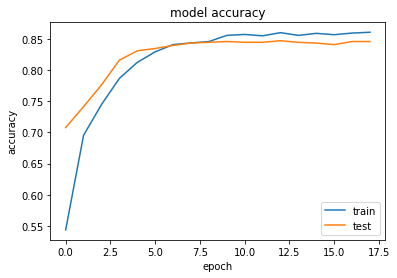

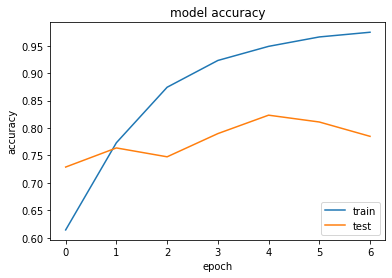

In [ ]:
target_names=['None','Support','Attack']
 
y_pred_m=[]
y_true_m=[]

# Assign one-hot encodings to Y values (0,1,2).
categorical_Y = to_categorical(Y_relation_type)

X_supporting_train, X_supporting_test, X_supporting_microtext_test  = X_supporting[sections_train_set], X_supporting[sections_test_set], X_supporting[sections_test_microtext_set]
X_supported_train, X_supported_test, X_supported_microtext_test  = X_supported[sections_train_set], X_supported[sections_test_set], X_supported[sections_test_microtext_set]
X_supporting_before_train, X_supporting_before_test, X_supporting_microtext_before_test = X_supporting_before[sections_train_set], X_supporting_before[sections_test_set], X_supporting_before[sections_test_microtext_set]
X_supported_before_train, X_supported_before_test, X_supported_microtext_before_test = X_supported_before[sections_train_set], X_supported_before[sections_test_set], X_supported_before[sections_test_microtext_set]
X_supporting_after_train, X_supporting_after_test, X_supporting_microtext_after_test = X_supporting_after[sections_train_set], X_supporting_after[sections_test_set], X_supporting_after[sections_test_microtext_set]
X_supported_after_train, X_supported_after_test, X_supported_microtext_after_test = X_supported_after[sections_train_set], X_supported_after[sections_test_set], X_supported_after[sections_test_microtext_set]
X_stat_train, X_stat_test, X_stat_microtext_test = X_sentence_stat_dataframe[sections_train_set], X_sentence_stat_dataframe[sections_test_set], X_sentence_stat_dataframe[sections_test_microtext_set]
Y_train, Y_test, Y_microtext_test = categorical_Y[sections_train_set], categorical_Y[sections_test_set], categorical_Y[sections_test_microtext_set]

# Train the model.
model,model_stat=train_MultiModal(X_supporting_train,X_supported_train,X_supporting_before_train,X_supported_before_train,X_supporting_after_train,X_supported_after_train,X_stat_train,Y_train)

y_pred_temp=model.predict([X_supporting_microtext_test,X_supported_microtext_test,X_supporting_microtext_before_test,X_supported_microtext_before_test,X_supporting_microtext_after_test,X_supported_microtext_after_test,X_stat_microtext_test])
for i in range(len(Y_microtext_test)):
  y_pred_m.append(np.argmax(y_pred_temp[i]))
  y_true_m.append(np.argmax(Y_microtext_test[i].tolist()))

In [ ]:
# Print the classification report of the result of the models created
print(classification_report(y_true_m, y_pred_m, target_names=target_names))   

              precision    recall  f1-score   support

        None       0.00      0.00      0.00         0
     Support       0.73      0.52      0.60       263
      Attack       0.00      0.00      0.00       108

    accuracy                           0.37       371
   macro avg       0.24      0.17      0.20       371
weighted avg       0.52      0.37      0.43       371



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


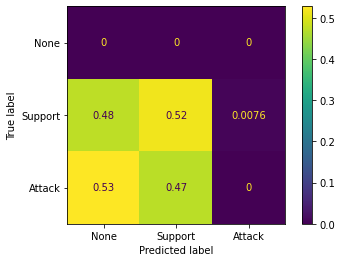

In [ ]:
# Print the confusion matrix.
cm=confusion_matrix(y_true_m, y_pred_m,normalize='true')

cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
cm_disp.plot()
plt.show()

## **Stat model results Microtext**

In [ ]:
y_pred=[]
y_true=[]

# Transform probabilities predicted in the most probable value (0 or 1).
y_pred_temp=model_stat.predict(X_stat_microtext_test).tolist()
for i in range(len(Y_microtext_test)):
  y_pred.append(np.argmax(y_pred_temp[i]))
  y_true.append(np.argmax(Y_microtext_test[i].tolist()))

In [ ]:
# Print the classification report of the result of the models created
print(classification_report(y_true, y_pred, target_names=target_names)) 

              precision    recall  f1-score   support

        None       0.00      0.00      0.00         0
     Support       0.72      0.92      0.81       263
      Attack       0.00      0.00      0.00       108

    accuracy                           0.65       371
   macro avg       0.24      0.31      0.27       371
weighted avg       0.51      0.65      0.57       371



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

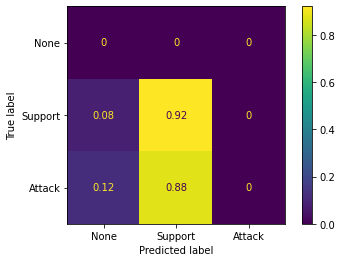

In [ ]:
# Print the confusion matrix.
cm=confusion_matrix(y_true, y_pred,normalize='true')

cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
cm_disp.plot()
plt.show()

## **Stab and Gurevych test set**

In [ ]:
y_pred_SG=[]
y_true_SG=[]

y_pred_temp=model.predict([X_supporting_test,X_supported_test,X_supporting_before_test,X_supported_before_test,X_supporting_after_test,X_supported_after_test,X_stat_test])
for i in range(len(Y_test)):
  y_pred_SG.append(np.argmax(y_pred_temp[i]))
  y_true_SG.append(np.argmax(Y_test[i].tolist()))

# Print the classification report of the result of the models created
print(classification_report(y_true_SG, y_pred_SG, target_names=target_names))

              precision    recall  f1-score   support

        None       0.67      0.83      0.74       319
     Support       0.86      0.78      0.82       542
      Attack       0.00      0.00      0.00        28

    accuracy                           0.77       889
   macro avg       0.51      0.54      0.52       889
weighted avg       0.76      0.77      0.76       889



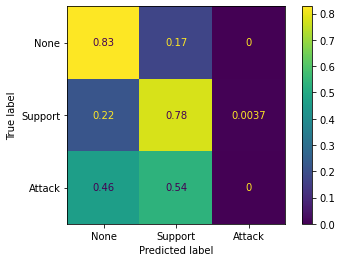

In [ ]:
# Print the confusion matrix.
cm=confusion_matrix(y_true_SG, y_pred_SG,normalize='true')

cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
cm_disp.plot()
plt.show()

## **Stat model results Stab and Gurevych**

In [ ]:
y_pred=[]
y_true=[]

# Transform probabilities predicted in the most probable value (0 or 1).
y_pred_temp=model_stat.predict(X_stat_test).tolist()
for i in range(len(Y_test)):
  y_pred.append(np.argmax(y_pred_temp[i]))
  y_true.append(np.argmax(Y_test[i].tolist()))

In [ ]:
# Print the classification report of the result of the models created
print(classification_report(y_true, y_pred, target_names=target_names)) 

              precision    recall  f1-score   support

        None       0.81      0.77      0.79       319
     Support       0.83      0.90      0.86       542
      Attack       0.00      0.00      0.00        28

    accuracy                           0.82       889
   macro avg       0.55      0.56      0.55       889
weighted avg       0.80      0.82      0.81       889



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


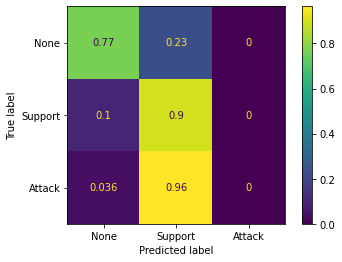

In [ ]:
# Print the confusion matrix.
cm=confusion_matrix(y_true, y_pred,normalize='true')

cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
cm_disp.plot()
plt.show()

# **Sentences predictions**

In [ ]:
# Gets in input the list of ture labels and predicted labels of the test set and returns
# two list.
# One of the list contain only if the prediction are write(1) or wrong(0).
# The other list contain also the indication of the tipe of mistake (true/false positive/negative).

def get_correct_predictions(y_true_list:list,y_pred_list:list)->(list,list):
  result_list=[]
  result_list_int=[]

  for i in range(0,len(y_true_list)):
    correct_prediction=""
    correct_prediction_int=1
    if y_pred_list[i]==0:
      if y_true_list[i]==0:
        correct_prediction="True none"
      else:
        if y_true_list[i]==1:
          correct_prediction="Support false none"
        else:
          correct_prediction="Attack false none"
        correct_prediction_int=0
    if y_pred_list[i]==1:
      if y_true_list[i]==1:
        correct_prediction="True support"
      else:
        if y_true_list[i]==0:
          correct_prediction="None false support"
        else:
          correct_prediction="Attack false support"
        correct_prediction_int=0
    if y_pred_list[i]==2:
      if y_true_list[i]==2:
        correct_prediction="True none"
      else:
        if y_true_list[i]==1:
          correct_prediction="Support false attack"
        else:
          correct_prediction="None false attack"
        correct_prediction_int=0    
    result_list.append(correct_prediction)
    result_list_int.append(correct_prediction_int)    

  return result_list, result_list_int

In [ ]:
# Create a list containing the correspondent value of true positive, ture negative,
# false positive and false negative, for the predicitons of the NN on the
# test sets of the two datset. 

# The correlation to select the feature to pass to the STC will be evaluated only 
# on the report of the presence of an error in each sentences (not considering the type
# of the error), sentence_prediction_int list.

sentence_prediction_SG, sentence_prediction_SG_int=get_correct_predictions(y_true_SG, y_pred_SG)
sentence_prediction_m, sentence_prediction_m_int=get_correct_predictions(y_true_m, y_pred_m)

# Get the version of the dataset used containing only the element of the test set.
test_set_essay_dataset=relation_ann_dataset.iloc[sections_test_set]
test_set_microtext_dataset=microtext_relation_ann_dataset

# Get the list of the couples of sentences and argumentative sec. in the test set.
test_set_sentences_list_SG=["sentence 1: "+sentence_list[relation_ann_dataset.iloc[i]['supporting_sentence_id']]+"\n sentence 2 :"+sentence_list[relation_ann_dataset.iloc[i]['supported_sentence_id']] for i in sections_test_set]
test_set_sentences_list_m=["sentence 1: "+sentence_list[microtext_relation_ann_dataset.iloc[i-len_skip]['supporting_sentence_id']]+"\n sentence 2 :"+sentence_list[microtext_relation_ann_dataset.iloc[i-len_skip]['supported_sentence_id']] for i in sections_test_microtext_set]

# Get the list of all the sentences used in the test set.
test_set_sentence_id_list_SG=[]
for i in sections_test_set:
  test_set_sentence_id_list_SG.append(relation_ann_dataset.iloc[i]['supporting_sentence_id'])
  test_set_sentence_id_list_SG.append(relation_ann_dataset.iloc[i]['supported_sentence_id'])
  for j in range(0,relation_ann_dataset.iloc[i]['supporting_section_length']):
    test_set_sentence_id_list_SG.append(relation_ann_dataset.iloc[i]['supporting_sentence_id']+1+j)
  for j in range(0,relation_ann_dataset.iloc[i]['supported_section_length']):
    test_set_sentence_id_list_SG.append(relation_ann_dataset.iloc[i]['supported_sentence_id']+1+j)
test_set_sentence_id_list_SG=list(set(test_set_sentence_id_list_SG))

test_set_sentence_id_list_m=[]
for i in sections_test_microtext_set:
  test_set_sentence_id_list_m.append(microtext_relation_ann_dataset.iloc[i-len_skip]['supporting_sentence_id'])
  test_set_sentence_id_list_m.append(microtext_relation_ann_dataset.iloc[i-len_skip]['supported_sentence_id'])
test_set_sentence_id_list_m=list(set(test_set_sentence_id_list_m))

argumentative_test_set_sentences_list_SG=["section 1: "+relation_ann_dataset.iloc[i]['supporting_text']+"\n senction 2 :"+relation_ann_dataset.iloc[i]['supported_text'] for i in sections_test_set]
argumentative_test_set_sentences_list_m=["section 1: "+microtext_relation_ann_dataset.iloc[i-len_skip]['supporting_text']+"\n senction 2 :"+microtext_relation_ann_dataset.iloc[i-len_skip]['supported_text'] for i in sections_test_microtext_set]

argument_test_set_sentences_list_SG=[relation_ann_dataset.iloc[i]['supporting_text'] for i in sections_test_set]
argument_test_set_sentences_list_SG+=[relation_ann_dataset.iloc[i]['supported_text'] for i in sections_test_set]
argument_test_set_sentences_list_m=[microtext_relation_ann_dataset.iloc[i-len_skip]['supporting_text'] for i in sections_test_microtext_set]
argument_test_set_sentences_list_m+=[microtext_relation_ann_dataset.iloc[i-len_skip]['supported_text'] for i in sections_test_microtext_set]

In [ ]:
test_set_essay_dataset.shape

(889, 8)

In [ ]:
test_set_microtext_dataset.shape

(371, 6)

In [ ]:
len(sentence_prediction_SG)

889

In [ ]:
len(sentence_prediction_m)

371

In [ ]:
sentence_prediction_SG.count("True none")

264

In [ ]:
sentence_prediction_SG.count("Support false none")

118

In [ ]:
sentence_prediction_SG.count("Attack false none")

13

In [ ]:
sentence_prediction_SG.count("True support")

422

In [ ]:
sentence_prediction_SG.count("None false support")

55

In [ ]:
sentence_prediction_SG.count("Attack false support")

15

In [ ]:
sentence_prediction_SG.count("True attack")

0

In [ ]:
sentence_prediction_SG.count("Support false attack")

2

In [ ]:
sentence_prediction_SG.count("None false attack")

0

In [ ]:
sentence_prediction_m.count("True none")

0

In [ ]:
sentence_prediction_m.count("Support false none")

125

In [ ]:
sentence_prediction_m.count("Attack false none")

57

In [ ]:
sentence_prediction_m.count("True support")

136

In [ ]:
sentence_prediction_m.count("None false support")

0

In [ ]:
sentence_prediction_m.count("Attack false support")

51

In [ ]:
sentence_prediction_m.count("True attack")

0

In [ ]:
sentence_prediction_m.count("Support false attack")

2

In [ ]:
sentence_prediction_m.count("None false attack")

0

## **Correaltion scores**

In [ ]:
# Compute the sorted correlation scores.
# Takes in input a dataframe and a list of labels, returns the sorted (from higher to lower) 
# list of columns names and their correlation value.

def get_correlation_scores(dataframe: pd.DataFrame, labels: list)->list:
  correlation_scores= []

  columns=dataframe.columns
  for column in columns:
    correlation, p_value = spearmanr(dataframe[column].values, labels)
    # Correlation absolute value.
    correlation = np.abs(correlation)
    correlation_scores.append((correlation,column))

  # Sort the correlation scores of each word with the lable by the correlation score associated.
  correlation_scores=sorted(correlation_scores, key=lambda x: (x[0]), reverse=True)    

  return correlation_scores

## **POS preparation**

In [ ]:
# Separate each sentence in the list of POS TAG that compones them.
POS_sentence_list=[nltk.pos_tag(nltk.word_tokenize(sentence)) for sentence in sentence_list]
POS_sentence_list_m=[nltk.pos_tag(nltk.word_tokenize(sentence)) for sentence in microtext_sentence_list]

POS_sentence_list[0]

[('it', 'PRP'),
 ('is', 'VBZ'),
 ('always', 'RB'),
 ('said', 'VBD'),
 ('that', 'IN'),
 ('competition', 'NN'),
 ('can', 'MD'),
 ('effectively', 'RB'),
 ('promote', 'VB'),
 ('the', 'DT'),
 ('development', 'NN'),
 ('of', 'IN'),
 ('economy', 'NN')]

In [ ]:
# Create a version with the simplifyed version of the POS tag.

simplified_POS_sentence_list=[]
simplified_POS_sentence_list_m=[]

for POS_sentence in POS_sentence_list:
  simplified_POS_sentence_list.append([(word, map_tag('en-ptb', 'universal', tag)) for word, tag in POS_sentence]) 

for POS_sentence in POS_sentence_list_m:
  simplified_POS_sentence_list_m.append([(word, map_tag('en-ptb', 'universal', tag)) for word, tag in POS_sentence]) 

In [ ]:
simplified_POS_sentence_list[0]

[('it', 'PRON'),
 ('is', 'VERB'),
 ('always', 'ADV'),
 ('said', 'VERB'),
 ('that', 'ADP'),
 ('competition', 'NOUN'),
 ('can', 'VERB'),
 ('effectively', 'ADV'),
 ('promote', 'VERB'),
 ('the', 'DET'),
 ('development', 'NOUN'),
 ('of', 'ADP'),
 ('economy', 'NOUN')]

In [ ]:
# Get the list of the sentences as POS tag from the list of the
# list of the POS tag of each sentence. 
def get_POS_sentence_list(POS_sentence_list: list)->list:
  POS_sentences=[]
  for POS_list in POS_sentence_list:
    sentence=""
    for word, tag in POS_list:
      sentence+=tag+" "
    POS_sentences.append(sentence)    

  return POS_sentences

In [ ]:
POS_sentences=get_POS_sentence_list(POS_sentence_list)
simple_POS_sentences=get_POS_sentence_list(simplified_POS_sentence_list)

POS_sentences_m=get_POS_sentence_list(POS_sentence_list_m)
simple_POS_sentences_m=get_POS_sentence_list(simplified_POS_sentence_list_m)

POS_sentences[0]

'PRP VBZ RB VBD IN NN MD RB VB DT NN IN NN '

## **Customised Tokenizer**

In [ ]:
#  Lemmatization is used.
def build_tokenizer(text):

  wordnet_lemmatizer = WordNetLemmatizer()

  # Text tokenization.
  tokens=nltk.word_tokenize(text)

  # Text normalization throgh lemmatizzation.

  lemmas=[]
  for word in tokens:
    lemmas.append(wordnet_lemmatizer.lemmatize(word))

  return lemmas  

## **Bag of words**

In [ ]:
# Trasformation of the passed corpus in the dataframe of the bag of ngram contained
# in it.
def bag_of_ngram(sentence_list: list, ngram: int)-> pd.DataFrame:
  vectorizer=CountVectorizer(tokenizer=build_tokenizer,ngram_range=(ngram,ngram))
  bag_ngram=vectorizer.fit_transform(sentence_list)

  dataframe=pd.DataFrame(bag_ngram.toarray(), columns=vectorizer.get_feature_names())

  return dataframe

## **From BOW of sentences to BOW of common elements of two sentences** 

In [ ]:
def sum_lists(first_list:list,second_list)->list:
  
  resulting_list=[first_list[i]+second_list[i] for i in range(len(first_list))]

  return resulting_list

In [ ]:
# Takes two lists in input and returns a list which has in each position the
# number of common occurrencies of the elmenent in the same position in the original
# lists.
def elements_in_common(supporting:list,supported:list)->list:
  common_list=[]
  for i in range(len(supporting)):
      common_list.append(min(supporting[i],supported[i]))
  return common_list      

In [ ]:
# Takes in input the dataframe of the relations and a dataframe representing the
# Bag of word of a ceirtain representation of the text, and returns in output the
# dataframe containing for each relation the list of common words of the two sections.

def two_BOW_to_single_common_BOW(relations_dataframe:pd.DataFrame,BOW:pd.DataFrame)->pd.DataFrame:
  dataframe_relation_common_BOW_list=[]
  columns_names=BOW.columns

  for relation in relations_dataframe.itertuples():
    supporting_sentence=relation.supporting_sentence_id
    supported_sentence=relation.supported_sentence_id

    supporting_sentence_BOW=BOW.loc[supporting_sentence]
    supported_sentence_BOW=BOW.loc[supported_sentence]

    for i in range(relation.supporting_section_length):
      supporting_sentence_BOW=sum_lists(supporting_sentence_BOW,BOW.loc[supporting_sentence+i+1])

    for i in range(relation.supported_section_length):
      supported_sentence_BOW=sum_lists(supported_sentence_BOW,BOW.loc[supported_sentence+i+1])  

    dataframe_relation_common_BOW_list.append(elements_in_common(list(supporting_sentence_BOW),list(supported_sentence_BOW)))

  common_BOW_dataframe=pd.DataFrame(dataframe_relation_common_BOW_list,columns=columns_names)  
  return common_BOW_dataframe

def two_BOW_to_single_common_BOW_microtext(relations_dataframe:pd.DataFrame,BOW:pd.DataFrame)->pd.DataFrame:
  dataframe_relation_common_BOW_list=[]
  columns_names=BOW.columns

  for relation in relations_dataframe.itertuples():
    supporting_sentence=relation.supporting_sentence_id
    supported_sentence=relation.supported_sentence_id

    supporting_sentence_BOW=BOW.loc[supporting_sentence]
    supported_sentence_BOW=BOW.loc[supported_sentence]

    dataframe_relation_common_BOW_list.append(elements_in_common(list(supporting_sentence_BOW),list(supported_sentence_BOW)))

  common_BOW_dataframe=pd.DataFrame(dataframe_relation_common_BOW_list,columns=columns_names)  
  return common_BOW_dataframe

In [ ]:
def two_BOW_to_single_common_BOW_arg_section(section_number:int,BOW:pd.DataFrame)->pd.DataFrame:
  dataframe_relation_common_BOW_list=[]
  columns_names=BOW.columns

  for i in range(section_number):

    dataframe_relation_common_BOW_list.append(elements_in_common(list(BOW.iloc[i]),list(BOW.iloc[i+section_number])))

  common_BOW_dataframe=pd.DataFrame(dataframe_relation_common_BOW_list,columns=columns_names)  
  return common_BOW_dataframe

## **POS Bigrams**

In [ ]:
# Get the BOW of the bigrams of the POS tag.

POS_bigrams=bag_of_ngram(POS_sentences,2)
simple_POS_bigrams=bag_of_ngram(simple_POS_sentences,2)

POS_bigrams=POS_bigrams.iloc[test_set_sentence_id_list_SG]
simple_POS_bigrams=simple_POS_bigrams.iloc[test_set_sentence_id_list_SG]

POS_bigrams_m=bag_of_ngram(POS_sentences_m,2)
simple_POS_bigrams_m=bag_of_ngram(simple_POS_sentences_m,2)

POS_bigrams_m=POS_bigrams_m.iloc[test_set_sentence_id_list_m]
simple_POS_bigrams_m=simple_POS_bigrams_m.iloc[test_set_sentence_id_list_m]

POS_bigrams.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,$ cc,$ cd,$ dt,$ in,$ jj,$ jjr,$ jjs,$ nn,$ nns,$ rb,$ vbg,$ vbn,'' ),"'' ,",'' dt,'' in,'' jj,'' jjr,'' nn,'' nns,'' rb,'' to,'' vbd,'' vbn,'' vbp,'' vbz,'' wp,'' wrb,( dt,( in,( jj,( nn,( nns,( prp,( vb,") ,",) in,) nns,) rb,) to,...,wdt vbp,wdt vbz,wdt wrb,wp $,"wp ,",wp dt,wp in,wp jj,wp md,wp nn,wp nnp,wp nns,wp prp,wp rb,wp to,wp vbd,wp vbp,wp vbz,"wrb ,",wrb cc,wrb cd,wrb dt,wrb ex,wrb in,wrb jj,wrb jjr,wrb jjs,wrb md,wrb nn,wrb nns,wrb pdt,wrb prp,wrb rb,wrb to,wrb vb,wrb vbd,wrb vbg,wrb vbn,wrb vbp,wrb vbz
2048,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2049,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6513,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Compute the correlation scores considering only the train test sentences.
POS_bigrams_common_BOW=two_BOW_to_single_common_BOW(test_set_essay_dataset,POS_bigrams)
simple_POS_bigrams_common_BOW=two_BOW_to_single_common_BOW(test_set_essay_dataset,simple_POS_bigrams)

POS_bigrams_common_BOW_m=two_BOW_to_single_common_BOW_microtext(test_set_microtext_dataset,POS_bigrams_m)
simple_POS_bigrams_common_BOW_m=two_BOW_to_single_common_BOW_microtext(test_set_microtext_dataset,simple_POS_bigrams_m)

In [ ]:
POS_bigrams_common_BOW.head()

,$ cc,$ cd,$ dt,$ in,$ jj,$ jjr,$ jjs,$ nn,$ nns,$ rb,$ vbg,$ vbn,'' ),"'' ,",'' dt,'' in,'' jj,'' jjr,'' nn,'' nns,'' rb,'' to,'' vbd,'' vbn,'' vbp,'' vbz,'' wp,'' wrb,( dt,( in,( jj,( nn,( nns,( prp,( vb,") ,",) in,) nns,) rb,) to,...,wdt vbp,wdt vbz,wdt wrb,wp $,"wp ,",wp dt,wp in,wp jj,wp md,wp nn,wp nnp,wp nns,wp prp,wp rb,wp to,wp vbd,wp vbp,wp vbz,"wrb ,",wrb cc,wrb cd,wrb dt,wrb ex,wrb in,wrb jj,wrb jjr,wrb jjs,wrb md,wrb nn,wrb nns,wrb pdt,wrb prp,wrb rb,wrb to,wrb vb,wrb vbd,wrb vbg,wrb vbn,wrb vbp,wrb vbz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**correlation score**

In [ ]:
correlation_scores_POS_bigram=get_correlation_scores(POS_bigrams_common_BOW,sentence_prediction_SG_int)
correlation_scores_simple_POS_bigram=get_correlation_scores(simple_POS_bigrams_common_BOW,sentence_prediction_SG_int)

correlation_scores_POS_bigram_m=get_correlation_scores(POS_bigrams_common_BOW_m,sentence_prediction_m_int)
correlation_scores_simple_POS_bigram_m=get_correlation_scores(simple_POS_bigrams_common_BOW_m,sentence_prediction_m_int)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [ ]:
# Remove NaN values.
correlation_scores_POS_bigram=[correlation_score for correlation_score in correlation_scores_POS_bigram if not math.isnan(correlation_score[0])]
correlation_scores_POS_bigram[0:10]

[(0.0409114460957515, '$ jj'),
 (0.014150730723319169, '$ nns'),
 (0.0025689959333079215, '$ nn'),
 (0.061688975251649576, ', ex'),
 (0.05050481114792047, ', nn'),
 (0.07177262973859624, ', nns'),
 (0.04267144816221638, ', dt'),
 (0.018206854350208995, ', rb'),
 (0.061688975251649576, ', to'),
 (0.02178596511297743, ', prp')]

In [ ]:
most_correlated_bigram_POS=[bigram[1] for bigram in correlation_scores_POS_bigram[0:100]]

In [ ]:
# Remove NaN values.
correlation_scores_POS_bigram_m=[correlation_score for correlation_score in correlation_scores_POS_bigram_m if not math.isnan(correlation_score[0])]
correlation_scores_POS_bigram_m[0:10]

[(0.06833821250046233, '$ rb'),
 (0.05622876499449248, '$ nns'),
 (0.039548922978990965, '$ cd'),
 (0.06833821250046233, '( nn'),
 (0.06833821250046233, ') .'),
 (0.13723239919449665, ', nn'),
 (0.11671004530186034, ', in'),
 (0.06833821250046233, '( wdt'),
 (0.06833821250046233, ') wp'),
 (0.06833821250046233, ', jj')]

In [ ]:
most_correlated_bigram_POS_m=[bigram[1] for bigram in correlation_scores_POS_bigram_m[0:100]]

In [ ]:
# Remove NaN values.
correlation_scores_simple_POS_bigram=[correlation_score for correlation_score in correlation_scores_simple_POS_bigram if not math.isnan(correlation_score[0])]
correlation_scores_simple_POS_bigram[0:10]

[(0.10039941942628654, '. noun'),
 (0.060292968207432046, '. det'),
 (0.0871638225776769, 'adj noun'),
 (0.07004270598558467, 'det noun'),
 (0.061688975251649576, '. prt'),
 (0.0463853328370119, '. adj'),
 (0.04100953476204335, '. conj'),
 (0.08359213856313509, 'det adp'),
 (0.061688975251649576, 'conj prt'),
 (0.061688975251649576, 'det conj')]

In [ ]:
most_correlated_bigram_simple_POS=[bigram[1] for bigram in correlation_scores_simple_POS_bigram[0:100]]

In [ ]:
# Remove NaN values.
correlation_scores_simple_POS_bigram_m=[correlation_score for correlation_score in correlation_scores_simple_POS_bigram_m if not math.isnan(correlation_score[0])]
correlation_scores_simple_POS_bigram_m[0:10]

[(0.15683515772490492, '. noun'),
 (0.11671004530186034, '. adp'),
 (0.14254803131294333, 'adp adj'),
 (0.11812465979364545, 'adj verb'),
 (0.10006556529714035, '. pron'),
 (0.039548922978990965, '. num'),
 (0.10733560504571582, 'adv verb'),
 (0.0967756933936353, '. .'),
 (0.0967756933936353, 'conj adp'),
 (0.08307031423198803, 'adv pron')]

In [ ]:
most_correlated_bigram_simple_POS_m=[bigram[1] for bigram in correlation_scores_simple_POS_bigram_m[0:100]]

## **Bag of words and Bigrams correlation**

In [ ]:
bag_words_dataframe=bag_of_ngram(sentence_list, 1)
bag_bigrams_dataframe=bag_of_ngram(sentence_list, 2)

bag_words_dataframe=bag_words_dataframe.iloc[test_set_sentence_id_list_SG]
bag_bigrams_dataframe=bag_bigrams_dataframe.iloc[test_set_sentence_id_list_SG]

bag_words_dataframe_m=bag_of_ngram(microtext_sentence_list, 1)
bag_bigrams_dataframe_m=bag_of_ngram(microtext_sentence_list, 2)

bag_words_dataframe_m=bag_words_dataframe_m.iloc[test_set_sentence_id_list_m]
bag_bigrams_dataframe_m=bag_bigrams_dataframe_m.iloc[test_set_sentence_id_list_m]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
bag_words_dataframe.head()

,!,%,&,','','3,'a,'cult,'dug,'globalization,'halo,'innovate,'ll,'low,'m,'re,'s,'social,'teachers,'this,'ve,'your,(,),",",-,--,.,...,0,1,10,100,10000,14,15,16,170,17th,18,...,wrap,write,writer,writing,written,wrong,wrongly,wrote,x,yahoo,yandex,yang,year,yearly,yell,yellow,yet,yield,yielding,york,you,young,younger,youngster,your,yours,yourself,youth,zappa,zeal,zero,zone,zoo,zookeepers,zoology,–,‘,’,“,”
2048,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2049,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6513,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
bag_bigrams_dataframe.head()

,"% ,",% country,% excellent,% in,% of,& study,"' ,",' ability,' accommodation,' accomplishment,' achievement,' acquisition,' acted,' adventurousness,' aim,' art,' attention,' attitude,' basic,' behavior,' benefit,' confidence,' control,' creation,' criticism,' culture,' current,' deeper,' development,' economic,' education,' effectiveness,' enthusiasm,' environment,' expectation,' experience,' family,' friend,' future,' hardship,...,zoo ha,zoo have,zoo is,zoo just,zoo kept,zoo not,zoo offer,zoo play,zoo preserve,zoo provide,zoo serve,zoo should,zoo than,zoo they,zoo to,zoo towards,zoo where,zoo will,zoo would,zoo you,"zookeepers ,",zookeepers have,zoology argue,– the,– these,– this,‘ ha,‘ trong,’ bay,’ civil,’ culture,’ drum,’ duty,’ health,’ m,’ s,’ solid,’ t,“ knowledge,” ha
2048,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2049,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6513,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_common_bag_words_dataframe=two_BOW_to_single_common_BOW(test_set_essay_dataset,bag_words_dataframe)
train_common_bag_bigrams_dataframe=two_BOW_to_single_common_BOW(test_set_essay_dataset,bag_bigrams_dataframe)

train_common_bag_words_dataframe_m=two_BOW_to_single_common_BOW_microtext(test_set_microtext_dataset,bag_words_dataframe_m)
train_common_bag_bigrams_dataframe_m=two_BOW_to_single_common_BOW_microtext(test_set_microtext_dataset,bag_bigrams_dataframe_m)

In [ ]:
train_common_bag_words_dataframe.head()

,!,%,&,','','3,'a,'cult,'dug,'globalization,'halo,'innovate,'ll,'low,'m,'re,'s,'social,'teachers,'this,'ve,'your,(,),",",-,--,.,...,0,1,10,100,10000,14,15,16,170,17th,18,...,wrap,write,writer,writing,written,wrong,wrongly,wrote,x,yahoo,yandex,yang,year,yearly,yell,yellow,yet,yield,yielding,york,you,young,younger,youngster,your,yours,yourself,youth,zappa,zeal,zero,zone,zoo,zookeepers,zoology,–,‘,’,“,”
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Select the 50 words/bigram most correlated to the output (correlation computed considering 
# only the train test).

correlation_scores_words=get_correlation_scores(train_common_bag_words_dataframe,sentence_prediction_SG_int)
correlation_scores_bigram=get_correlation_scores(train_common_bag_bigrams_dataframe,sentence_prediction_SG_int)

correlation_scores_words_m=get_correlation_scores(train_common_bag_words_dataframe_m,sentence_prediction_m_int)
correlation_scores_bigram_m=get_correlation_scores(train_common_bag_bigrams_dataframe_m,sentence_prediction_m_int)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [ ]:
correlation_scores_words=[correlation_score for correlation_score in correlation_scores_words if not math.isnan(correlation_score[0])]
correlation_scores_words[0:10]

[(0.061688975251649576, 'house'),
 (0.03165404213685566, "'"),
 (0.04131112394014, "'s"),
 (0.11308093226917298, ','),
 (0.030729836260969576, ';'),
 (0.00526312682177891, 'a'),
 (0.030729836260969576, 'able'),
 (0.01814338193269161, 'about'),
 (0.025830876857046887, 'accommodation'),
 (0.018254900839773852, 'accomplishment')]

In [ ]:
most_correlated_word=[word[1] for word in correlation_scores_words[0:100]]

In [ ]:
correlation_scores_words_m=[correlation_score for correlation_score in correlation_scores_words_m if not math.isnan(correlation_score[0])]
correlation_scores_words_m[0:10]

[(0.10581163317945817, ','),
 (0.0967756933936353, '('),
 (0.0967756933936353, ')'),
 (0.06833821250046233, 'changed'),
 (0.058953356299090424, "'s"),
 (0.039548922978990965, '&'),
 (0.039548922978990965, '-'),
 (0.04672411361736368, '.'),
 (0.039548922978990965, "'ll"),
 (0.039548922978990965, '10pm')]

In [ ]:
most_correlated_word_m=[word[1] for word in correlation_scores_words_m[0:100]]

In [ ]:
correlation_scores_bigram=[correlation_score for correlation_score in correlation_scores_bigram if not math.isnan(correlation_score[0])]
correlation_scores_bigram[0:10]

[(0.018254900839773852, "' accomplishment"),
 (0.018254900839773852, "' mistake"),
 (0.018254900839773852, "' personality"),
 (0.061688975251649576, "'s future"),
 (0.08729054937898605, "'s health"),
 (0.018254900839773852, "'s life"),
 (0.018254900839773852, "'s mistake"),
 (0.061688975251649576, "'s part"),
 (0.018254900839773852, "'s revenue"),
 (0.061688975251649576, "'s undeniable")]

In [ ]:
most_correlated_bigram=[bigram[1] for bigram in correlation_scores_bigram[0:100]]

In [ ]:
correlation_scores_bigram_m=[correlation_score for correlation_score in correlation_scores_bigram_m if not math.isnan(correlation_score[0])]
correlation_scores_bigram_m[0:10]

[(0.039548922978990965, '& radio'),
 (0.039548922978990965, "'ll want"),
 (0.06833821250046233, "'s mainly"),
 (0.06833821250046233, "'s no"),
 (0.05600635872993362, "'s number"),
 (0.06833821250046233, '( capital'),
 (0.06833821250046233, '( that'),
 (0.06833821250046233, ') .'),
 (0.06833821250046233, ') who'),
 (0.03676304397585089, ', a')]

In [ ]:
most_correlated_bigram_m=[bigram[1] for bigram in correlation_scores_bigram_m[0:100]]

## **Argumentative sections: Bag of words correlation**

In [ ]:
a_bag_words_dataframe=bag_of_ngram(argument_test_set_sentences_list_SG, 1)
a_bag_words_dataframe_m=bag_of_ngram(argument_test_set_sentences_list_m, 1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
a_train_common_bag_words_dataframe=two_BOW_to_single_common_BOW_arg_section(test_set_essay_dataset.shape[0],a_bag_words_dataframe)
a_train_common_bag_words_dataframe_m=two_BOW_to_single_common_BOW_arg_section(test_set_microtext_dataset.shape[0],a_bag_words_dataframe_m)

In [ ]:
a_train_common_bag_words_dataframe.head()

,%,','','s,'teachers,'this,'ve,'your,",",-,.,1,10,15,1969,1st,2,2030,370,40,4:00,99,:,;,``,a,ability,able,about,above,abroad,absence,absolutely,absorb,absorbed,abstract,academic,accelarates,accelerate,accept,...,wild,wildlife,will,win,window,wing,wish,with,within,without,witnessed,woman,wonderful,word,wore,work,worked,worker,working,workplace,world,worldwide,worsens,worth,worthwhile,would,writer,writing,written,wrong,year,you,young,youngster,your,zappa,zoo,–,’,“
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
a_correlation_scores_words=get_correlation_scores(a_train_common_bag_words_dataframe,sentence_prediction_SG_int)
a_correlation_scores_words_m=get_correlation_scores(a_train_common_bag_words_dataframe_m,sentence_prediction_m_int)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [ ]:
a_correlation_scores_words=[correlation_score for correlation_score in a_correlation_scores_words if not math.isnan(correlation_score[0])]
a_correlation_scores_words[0:10]

[(0.03075412154784079, 'automobile'),
 (0.025830876857046887, "'"),
 (0.0014754463162427313, "'s"),
 (0.019296079005171225, ','),
 (0.026874441540743678, 'a'),
 (0.005078662273955359, 'about'),
 (0.025830876857046887, 'accommodation'),
 (0.030729836260969576, 'activity'),
 (0.025830876857046887, 'after'),
 (0.023460880887404775, 'agriculture')]

In [ ]:
a_correlation_scores_words_m=[correlation_score for correlation_score in a_correlation_scores_words_m if not math.isnan(correlation_score[0])]
a_correlation_scores_words_m[0:10]

[(0.06833821250046233, 'alternative'),
 (0.039548922978990965, '&'),
 (0.05622876499449248, "'s"),
 (0.010200265731297063, ','),
 (0.013439025005981469, '.'),
 (0.05600635872993362, '63'),
 (0.03804906355540265, 'a'),
 (0.039548922978990965, 'actually'),
 (0.06833821250046233, 'age'),
 (0.039548922978990965, 'air')]

In [ ]:
a_most_correlated_word=[word[1] for word in a_correlation_scores_words[0:100]]
a_most_correlated_word_m=[word[1] for word in a_correlation_scores_words_m[0:100]]

# **STC SG**

In [ ]:
# Read the datasets retrieved by the Stab and Gurevych dataset.

statistic=pd.read_csv('relation_statistic.csv')
statistic=statistic.iloc[sections_test_set]
statistic.reset_index(drop=True, inplace=True)

POS=pd.read_csv('relation_POS.csv')
POS=POS.iloc[sections_test_set]
POS.reset_index(drop=True, inplace=True)

simple_POS=pd.read_csv('relation_simple_POS.csv')
simple_POS=simple_POS.iloc[sections_test_set]
simple_POS.reset_index(drop=True, inplace=True)

bigram_POS=POS_bigrams_common_BOW[most_correlated_bigram_POS]
bigram_POS.reset_index(drop=True, inplace=True)

bigram_simple_POS=simple_POS_bigrams_common_BOW[most_correlated_bigram_simple_POS]
bigram_simple_POS.reset_index(drop=True, inplace=True)

dependency=pd.read_csv('relation_dependency.csv')
dependency=dependency.iloc[sections_test_set]
dependency.reset_index(drop=True, inplace=True)

dependency_tree_stat=pd.read_csv('relation_dependency_tree_stat.csv')
dependency_tree_stat=dependency_tree_stat.iloc[sections_test_set]
dependency_tree_stat.reset_index(drop=True, inplace=True)

named_entity=pd.read_csv('relation_named_entity_BOW.csv')
named_entity=named_entity.iloc[sections_test_set]
named_entity.reset_index(drop=True, inplace=True)

BOW=train_common_bag_words_dataframe[most_correlated_word]
BOW.reset_index(drop=True, inplace=True)

Bigram=train_common_bag_bigrams_dataframe[most_correlated_bigram]
Bigram.reset_index(drop=True, inplace=True)

imported_ngram=pd.read_csv('relation_imported_ngram.csv')
imported_ngram=imported_ngram.iloc[sections_test_set]
imported_ngram.reset_index(drop=True, inplace=True)

others=pd.read_csv('relation_remaining_stat.csv')
others=others.iloc[sections_test_set]
others.reset_index(drop=True, inplace=True)

a_BOW=a_train_common_bag_words_dataframe[a_most_correlated_word]
a_BOW.reset_index(drop=True, inplace=True)

In [ ]:
statistic.shape

(889, 3)

In [ ]:
bigram_POS.shape

(889, 100)

In [ ]:
# Remove data types that are not categorical.
statistic=statistic.drop(columns=['length_sentence_ratio'])
others=others.drop(columns=['supported: type token ratio'])
others=others.drop(columns=['supporting: type token ratio'])
statistic=statistic.round(0)
statistic=statistic.abs()
others=others.round(0)

In [ ]:
# Combine the dataframe of the type of data used in the NN and of the data not 
# used.
dataframe_non_used=statistic
dataframe_non_used=pd.concat([dataframe_non_used,POS], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,dependency], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,dependency_tree_stat], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,imported_ngram], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,others], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,bigram_POS], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,bigram_simple_POS], axis=1)
print(dataframe_non_used.shape)
dataframe_non_used=pd.concat([dataframe_non_used,Bigram], axis=1)
print(dataframe_non_used.shape)

dataframe_used=simple_POS
dataframe_used=pd.concat([dataframe_used,BOW], axis=1)
print(dataframe_used.shape)
dataframe_used=pd.concat([dataframe_used,named_entity], axis=1)
print(dataframe_used.shape)

(889, 41)
(889, 85)
(889, 89)
(889, 129)
(889, 131)
(889, 231)
(889, 325)
(889, 425)
(889, 112)
(889, 129)


In [ ]:
dataframe_used.shape

(889, 129)

In [ ]:
sentence_predictions_SG = pd.DataFrame(data={'argumentative': sentence_prediction_SG})

## **Learning**

In [ ]:
# Divide the items in a train and a test set.
list_index=[i for i in range(others.shape[0])]

train_index,test_index=train_test_split(list_index,test_size=0.2, random_state=32)

In [ ]:
pos_attackFnone=-1
pos_supportFnone=-1
pos_attackFsupport=-1
pos_noneFsupport=-1
pos_supportFattack=-1
pos_noneFattack=-1
count=0
instance_attackFnone=""
instance_supportFnone=""
instance_attackFsupport=""
instance_noneFsupport=""
instance_supportFattack=""
instance_noneFattack=""
sec_instance_attackFnone=""
sec_instance_supportFnone=""
sec_instance_attackFsupport=""
sec_instance_noneFsupport=""
sec_instance_supportFattack=""
sec_instance_noneFattack=""

for i in test_index:
  if sentence_prediction_SG[i]=='Attack false none':
    instance_attackFnone=test_set_sentences_list_SG[i]
    sec_instance_attackFnone=argumentative_test_set_sentences_list_SG[i]
    pos_attackFnone=count
  if sentence_prediction_SG[i]=='Support false none':
    instance_supportFnone=test_set_sentences_list_SG[i]
    sec_instance_supportFnone=argumentative_test_set_sentences_list_SG[i]
    pos_supportFnone=count
  if sentence_prediction_SG[i]=='Support false attack':
    instance_supportFattack=test_set_sentences_list_SG[i]
    sec_instance_supportFattack=argumentative_test_set_sentences_list_SG[i]
    pos_supportFattack=count
  if sentence_prediction_SG[i]=='None false support':
    instance_noneFsupport=test_set_sentences_list_SG[i]
    sec_instance_noneFsupport=argumentative_test_set_sentences_list_SG[i]
    pos_noneFsupport=count
  if sentence_prediction_SG[i]=='None false attack':
    instance_noneFattack=test_set_sentences_list_SG[i]
    sec_instance_noneFattack=argumentative_test_set_sentences_list_SG[i]
    pos_noneFattack=count
  if sentence_prediction_SG[i]=='Attack false support':
    instance_attackFsupport=test_set_sentences_list_SG[i]
    sec_instance_attackFsupport=argumentative_test_set_sentences_list_SG[i]
    pos_attackFsupport=count        
  if not (pos_attackFsupport==-1 or pos_noneFattack==-1 or pos_noneFsupport==-1 or pos_supportFattack==-1 or pos_supportFnone==-1 or pos_attackFnone==-1):
    break
  count+=1  

print(instance_attackFsupport)
print(instance_noneFattack)
print(instance_noneFsupport)
print(instance_supportFattack)
print(instance_supportFnone)
print(instance_attackFnone)
print(sec_instance_attackFsupport)
print(sec_instance_noneFattack)
print(sec_instance_noneFsupport)
print(sec_instance_supportFattack)
print(sec_instance_supportFnone)
print(sec_instance_attackFnone)
print(pos_attackFsupport)
print(pos_noneFattack)
print(pos_noneFsupport)
print(pos_supportFattack)
print(pos_supportFnone)
print(pos_attackFnone)

sentence 1: for me being a developed country does not mean that we have to focus only in business , but we have to focus on what really bring us to the level of self satisfaction , and the agriculture for our country is the field that can realize that 
 sentence 2 :some people think that a centre of business research is more important because we have to be in parallel with the advanced countries which have focused in business field 

sentence 1: first and foremost , carbon emission cut is significantly essential for protecting the atmosphere 
 sentence 2 :obviously , the policy that concentrates money on developing public transportation brings an advantageous impact on earth 

sentence 1: but rare people have been aware that this has contributed to a modification of cooking habits , which may cause the loss of our custom and culture about cooking 
 sentence 2 :the more prepared food we eat the more cooking skills we lose 
sentence 1: but a more efficient and reliable system can also be

In [ ]:
# The method takes in input a dataframe containing the data from which to predict
# the output and the output labels desired and returns, the label for the 
# test set, the probabilities of the predicted classes, and the global and local 
# explanations of which features are most usefoul in predicting the labels.

def stc_procedure(dataframe:pd.DataFrame,label:pd.DataFrame):
  dataframe['argumentative']=label['argumentative'].tolist()

  STC = SparseTensorClassifier(targets=['argumentative'], features=dataframe.columns[:-1])

  STC.fit(dataframe.iloc[train_index])

  STC.set({"entropy": 1, "balance": 0.9, "power": 1})

  global_explainability = STC.explain()

  labels, probability, explainability = STC.predict(dataframe.iloc[test_index])

  ground_labels=dataframe['argumentative'].iloc[test_index]

  return ground_labels, global_explainability, labels, probability, explainability

## **Not used stat dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(dataframe_non_used,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7528089887640449
f1 score: 0.3140120861401208
precision: 0.2985350143356506
recall: 0.4545138888888889


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:25]

In [ ]:
global_explainability_tabular.loc["Support false none"][:25]

,features,score
argumentative,,
Support false none,verb adp: 0,0.000277
Support false none,supported: max number of children of a ROOT no...,0.000277
Support false none,in: 1,0.000273
Support false none,position_in_essay_distance: 2,0.000268
Support false none,det: 0,0.000236
Support false none,dt: 0,0.000197
Support false none,verb verb: 0,0.000194
Support false none,prep: 1,0.000191
Support false none,amod: 0,0.000191


In [ ]:
global_explainability_tabular.loc["Attack false support"][:25]

,features,score
argumentative,,
Attack false support,ex vbp: 1,0.000957
Attack false support,expl: 1,0.000853
Attack false support,ex: 1,0.000760
Attack false support,a job: 1,0.000681
Attack false support,in vbg: 1,0.000621
Attack false support,adp verb: 1,0.000603
Attack false support,in jj: 1,0.000555
Attack false support,adp adj: 1,0.000553
Attack false support,a long: 1,0.000401


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:25]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:25]

In [ ]:
global_explainability_tabular.loc["None false support"][:25]

,features,score
argumentative,,
None false support,position_in_essay_distance: 2,0.000377
None false support,in: 1,0.000267
None false support,verb adp: 0,0.000264
None false support,det: 0,0.000253
None false support,noun noun: 1,0.000220
None false support,verb verb: 0,0.000210
None false support,supporting: max number of children of a ROOT n...,0.000202
None false support,dt: 0,0.000192
None false support,supported: max number of children of a ROOT no...,0.000188


In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:15]

features         score
item argumentative                                                
122  Attack false support                   in jj: 1  1.305161e-06
     Attack false support                 adp adj: 1  1.300654e-06
     Attack false support                det verb: 1  8.601110e-07
     Attack false support                   ccomp: 1  7.113290e-07
     Attack false support                verb adp: 3  6.309226e-07
     Attack false support               noun verb: 2  4.183296e-07
     Attack false support                  advmod: 1  4.120554e-07
     Attack false support  supported: tree depth: 11  3.842783e-07
     Attack false support                noun det: 1  3.808566e-07
     Attack false support                    pobj: 4  3.748632e-07
     Attack false support                      to: 1  3.653204e-07
     Attack false support                det noun: 2  3.488166e-07
     Attack false support      paragraph distance: 0  3.305691e-07
     Attack false support                      nn: 5  3.150315e-07
     Attack false support                    mark: 1  3.007690e-07

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:15]

In [ ]:
explainability.loc[(pos_noneFsupport,'None false support')][0:15]

features         score
item argumentative                                                                      
158  None false support                                              in: 1  6.282279e-07
     None false support                                        verb adp: 0  6.201367e-07
     None false support                                       verb verb: 0  4.937164e-07
     None false support                 supported: subjectivity score: 0.0  4.152294e-07
     None false support                                            amod: 0  3.822659e-07
     None false support                                       noun verb: 1  3.798220e-07
     None false support                              paragraph distance: 0  3.661256e-07
     None false support                                           punct: 1  3.430623e-07
     None false support                                            prep: 1  3.350186e-07
     None false support                                               ,: 1  3.122964e-07
     None false support                                            dobj: 1  2.985165e-07
     None false support  supported: max number of children of a ROOT no...  2.859347e-07
     None false support                                             nns: 0  2.421908e-07
     None false support                                              rb: 1  2.420581e-07
     None false support                                          in vbg: 1  2.408916e-07

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:15]

In [ ]:
explainability.loc[(pos_supportFnone,'Support false none')][0:15]

features         score
item argumentative                                                                      
165  Support false none                                        verb adp: 0  6.508324e-07
     Support false none                      position_in_essay_distance: 2  6.307287e-07
     Support false none                                       verb verb: 0  4.563692e-07
     Support false none                                        det noun: 0  4.100760e-07
     Support false none                              paragraph distance: 0  4.027927e-07
     Support false none                           supported: tree depth: 4  3.401092e-07
     Support false none  supported: max number of children of a ROOT no...  3.340664e-07
     Support false none                                              in: 0  3.188485e-07
     Support false none                                              jj: 2  2.856407e-07
     Support false none                                            dobj: 1  2.765416e-07
     Support false none                                           punct: 0  2.683861e-07
     Support false none                                             nns: 1  2.655654e-07
     Support false none                                       noun verb: 0  2.591753e-07
     Support false none                                          advmod: 0  2.453066e-07
     Support false none                                              nn: 1  2.395874e-07

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:15]

## **Used stat dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(dataframe_used,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.4606741573033708
f1 score: 0.23441564474173168
precision: 0.29110985632724756
recall: 0.34246721415839065


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:25]

In [ ]:
global_explainability_tabular.loc["Support false none"][:25]

,features,score
argumentative,,
Support false none,adp: 1,0.000799
Support false none,verb: 3,0.000561
Support false none,det: 0,0.000535
Support false none,adj: 0,0.000519
Support false none,verb: 2,0.000417
Support false none,artist: 1,0.000410
Support false none,adp: 0,0.000396
Support false none,.: 1,0.000395
Support false none,adp: 3,0.000388


In [ ]:
global_explainability_tabular.loc["Attack false support"][:25]

,features,score
argumentative,,
Attack false support,advantage: 1,0.002187
Attack false support,a: 1,0.001216
Attack false support,verb: 5,0.001200
Attack false support,at: 1,0.001200
Attack false support,co-operation: 1,0.001172
Attack false support,best: 1,0.001172
Attack false support,always: 1,0.001172
Attack false support,be: 2,0.001172
Attack false support,choice: 1,0.000901


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:25]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:25]

In [ ]:
global_explainability_tabular.loc["None false support"][:25]

,features,score
argumentative,,
None false support,adp: 1,0.000781
None false support,verb: 2,0.000709
None false support,det: 0,0.000562
None false support,a: 1,0.000468
None false support,adp: 2,0.000451
None false support,pron: 2,0.000447
None false support,verb: 4,0.000443
None false support,verb: 3,0.000406
None false support,and: 1,0.000396


In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:15]

features         score
item argumentative                                   
122  Attack false support          a: 1  9.428200e-06
     Attack false support        det: 4  3.453538e-06
     Attack false support        adv: 1  3.347766e-06
     Attack false support        adj: 2  2.948603e-06
     Attack false support        prt: 1  2.495444e-06
     Attack false support       noun: 7  2.357562e-06
     Attack false support       verb: 6  1.267727e-06
     Attack false support          .: 0  8.690437e-07
     Attack false support          ,: 0  8.679247e-07
     Attack false support       conj: 0  4.114334e-07
     Attack false support       pron: 1  3.254541e-07
     Attack false support        and: 0  1.347475e-07
     Attack false support        are: 0  6.430182e-08
     Attack false support        can: 0  6.388287e-08
     Attack false support  advantage: 0  3.924979e-08

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:15]

In [ ]:
explainability.loc[(pos_noneFsupport,'None false support')][0:15]

features         score
item argumentative                            
158  None false support   adp: 1  6.052513e-06
     None false support  verb: 2  5.494930e-06
     None false support     ,: 1  3.008746e-06
     None false support     .: 1  2.991798e-06
     None false support   adv: 1  2.208936e-06
     None false support   adj: 1  1.083823e-06
     None false support  noun: 4  1.056870e-06
     None false support   det: 1  9.283517e-07
     None false support  pron: 0  6.478465e-07
     None false support     a: 0  4.245070e-07
     None false support  conj: 0  4.185219e-07
     None false support   prt: 0  4.079515e-07
     None false support   and: 0  1.238384e-07
     None false support   are: 0  8.678430e-08
     None false support   can: 0  8.254660e-08

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:15]

In [ ]:
explainability.loc[(pos_supportFnone,'Support false none')][0:15]

features         score
item argumentative                            
165  Support false none  verb: 2  3.235101e-06
     Support false none   adp: 0  3.071871e-06
     Support false none   adj: 2  2.988089e-06
     Support false none  noun: 2  2.254658e-06
     Support false none     ,: 0  1.978982e-06
     Support false none     .: 0  1.944838e-06
     Support false none   adv: 0  1.517701e-06
     Support false none   det: 2  1.082892e-06
     Support false none  pron: 1  5.313644e-07
     Support false none  conj: 0  5.095972e-07
     Support false none   prt: 0  5.063053e-07
     Support false none     a: 0  4.959503e-07
     Support false none   and: 0  1.511825e-07
     Support false none   are: 0  9.576973e-08
     Support false none   can: 0  8.272124e-08

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:15]

## **Statistic dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(statistic,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.5280898876404494
f1 score: 0.2298557633541132
precision: 0.2523056653491436
recall: 0.2465599876314162


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:15]

In [ ]:
global_explainability_tabular.loc["Support false none"][:15]

,features,score
argumentative,,
Support false none,position_in_essay_distance: 2,0.033331
Support false none,paragraph distance: 0,0.021286
Support false none,position_in_essay_distance: 0,0.011948
Support false none,position_in_essay_distance: 6,0.011693
Support false none,position_in_essay_distance: 3,0.008915
Support false none,position_in_essay_distance: 1,0.008023
Support false none,position_in_essay_distance: 4,0.005423
Support false none,position_in_essay_distance: 5,0.005110


In [ ]:
global_explainability_tabular.loc["Attack false support"][:15]

,features,score
argumentative,,
Attack false support,position_in_essay_distance: 0,0.040424
Attack false support,paragraph distance: 0,0.017469
Attack false support,position_in_essay_distance: 1,0.008143
Attack false support,position_in_essay_distance: 2,0.007894
Attack false support,position_in_essay_distance: 3,0.006598
Attack false support,position_in_essay_distance: 4,0.002919


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:15]

In [ ]:
global_explainability_tabular.loc["None false support"][:15]

,features,score
argumentative,,
None false support,position_in_essay_distance: 2,0.046877
None false support,paragraph distance: 0,0.019348
None false support,paragraph distance: 1,0.009373
None false support,position_in_essay_distance: 1,0.008507
None false support,position_in_essay_distance: 6,0.005710
None false support,position_in_essay_distance: 3,0.005442
None false support,position_in_essay_distance: 0,0.003334
None false support,position_in_essay_distance: 5,0.003327
None false support,position_in_essay_distance: 4,0.002889


In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:5]

features     score
item argumentative                                                
122  Attack false support          paragraph distance: 0  0.008735
     Attack false support  position_in_essay_distance: 1  0.004071

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:5]

In [ ]:
explainability.loc[(pos_noneFsupport,'None false support')][0:5]

features     score
item argumentative                                              
158  None false support          paragraph distance: 0  0.009674
     None false support  position_in_essay_distance: 5  0.001663

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:5]

In [ ]:
explainability.loc[(pos_supportFnone,'Support false none')][0:5]

features     score
item argumentative                                              
165  Support false none  position_in_essay_distance: 2  0.016666
     Support false none          paragraph distance: 0  0.010643

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:5]

## **POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(POS,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.4157303370786517
f1 score: 0.17249666221628837
precision: 0.17202582728006455
recall: 0.1889339826839827


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:15]

In [ ]:
global_explainability_tabular.loc["Support false none"][:15]

,features,score
argumentative,,
Support false none,in: 1,0.002346
Support false none,dt: 0,0.001689
Support false none,nn: 2,0.001342
Support false none,in: 0,0.001163
Support false none,in: 3,0.001139
Support false none,",: 1",0.001137
Support false none,jjr: 2,0.001084
Support false none,jj: 2,0.001042
Support false none,nns: 3,0.001020


In [ ]:
global_explainability_tabular.loc["Attack false support"][:15]

,features,score
argumentative,,
Attack false support,ex: 1,0.006523
Attack false support,jjs: 1,0.002823
Attack false support,jj: 6,0.002599
Attack false support,md: 2,0.002145
Attack false support,jj: 5,0.002099
Attack false support,in: 3,0.002076
Attack false support,vbg: 1,0.001856
Attack false support,in: 1,0.001736
Attack false support,",: 1",0.001726


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:15]

In [ ]:
global_explainability_tabular.loc["None false support"][:15]

,features,score
argumentative,,
None false support,in: 1,0.002291
None false support,dt: 0,0.001649
None false support,in: 2,0.001323
None false support,",: 1",0.001139
None false support,$: 1,0.001134
None false support,prp: 2,0.001132
None false support,jj: 4,0.001089
None false support,nns: 1,0.000946
None false support,cc: 1,0.000926


In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:5]

features     score
item argumentative                          
122  Attack false support    to: 1  0.000034
     Attack false support    nn: 5  0.000029
     Attack false support   wdt: 1  0.000026
     Attack false support    jj: 2  0.000020
     Attack false support   vbz: 1  0.000018

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:5]

In [ ]:
explainability.loc[(pos_noneFsupport,'None false support')][0:5]

features     score
item argumentative                        
158  None false support    in: 1  0.000059
     None false support     ,: 1  0.000029
     None false support   nns: 0  0.000023
     None false support    rb: 1  0.000023
     None false support   vbg: 1  0.000021

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:5]

In [ ]:
explainability.loc[(pos_supportFnone,'Support false none')][0:5]

features     score
item argumentative                        
165  Support false none    in: 0  0.000030
     Support false none    jj: 2  0.000027
     Support false none   nns: 1  0.000025
     Support false none    nn: 1  0.000022
     Support false none     ,: 0  0.000019

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:5]

## **Simple POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(simple_POS,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.43820224719101125
f1 score: 0.2022751533800596
precision: 0.2415105386416862
recall: 0.20069232238349885


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:15]

In [ ]:
global_explainability_tabular.loc["Support false none"][:15]

,features,score
argumentative,,
Support false none,adp: 1,0.006777
Support false none,verb: 3,0.004758
Support false none,det: 0,0.004534
Support false none,adj: 0,0.004400
Support false none,verb: 2,0.003538
Support false none,adp: 0,0.003359
Support false none,.: 1,0.003350
Support false none,adp: 3,0.003291
Support false none,adj: 2,0.003268


In [ ]:
global_explainability_tabular.loc["Attack false support"][:15]

,features,score
argumentative,,
Attack false support,verb: 5,0.010172
Attack false support,adj: 6,0.006555
Attack false support,adj: 5,0.006506
Attack false support,adp: 3,0.005996
Attack false support,adp: 1,0.005016
Attack false support,.: 1,0.004959
Attack false support,pron: 3,0.004705
Attack false support,det: 5,0.004519
Attack false support,num: 1,0.004429


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:15]

In [ ]:
global_explainability_tabular.loc["None false support"][:15]

,features,score
argumentative,,
None false support,adp: 1,0.006619
None false support,verb: 2,0.006009
None false support,det: 0,0.004768
None false support,adp: 2,0.003821
None false support,pron: 2,0.003792
None false support,verb: 4,0.003754
None false support,verb: 3,0.003442
None false support,.: 1,0.003272
None false support,adj: 0,0.002946


In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:5]

features     score
item argumentative                          
122  Attack false support   det: 4  0.000315
     Attack false support   adv: 1  0.000305
     Attack false support   adj: 2  0.000269
     Attack false support   prt: 1  0.000227
     Attack false support  noun: 7  0.000215

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:5]

In [ ]:
explainability.loc[(pos_noneFsupport,'None false support')][0:5]

features     score
item argumentative                        
158  None false support   adp: 1  0.000552
     None false support  verb: 2  0.000501
     None false support     .: 1  0.000273
     None false support   adv: 1  0.000201
     None false support   adj: 1  0.000099

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:5]

In [ ]:
explainability.loc[(pos_supportFnone,'Support false none')][0:5]

features     score
item argumentative                        
165  Support false none  verb: 2  0.000295
     Support false none   adp: 0  0.000280
     Support false none   adj: 2  0.000272
     Support false none  noun: 2  0.000205
     Support false none     .: 0  0.000177

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:5]

## **bigram POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(bigram_POS,sentence_predictions_SG)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.4044943820224719
f1 score: 0.13646656081597003
precision: 0.1668648041740968
recall: 0.2618235930735931


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:15]

In [ ]:
global_explainability_tabular.loc["Support false none"][:15]

,features,score
argumentative,,
Support false none,in jj: 1,0.000402
Support false none,"nn ,: 1",0.000345
Support false none,jjr nn: 1,0.000335
Support false none,in nn: 1,0.000328
Support false none,jj nns: 1,0.000314
Support false none,dt nn: 2,0.000302
Support false none,jjr nns: 1,0.000287
Support false none,dt nn: 3,0.000278
Support false none,nn in: 3,0.000274


In [ ]:
global_explainability_tabular.loc["Attack false support"][:15]

,features,score
argumentative,,
Attack false support,ex vbp: 1,0.003519
Attack false support,in vbg: 1,0.002282
Attack false support,in jj: 1,0.002040
Attack false support,", ex: 1",0.001474
Attack false support,jjs nn: 1,0.001474
Attack false support,dt jjs: 1,0.001474
Attack false support,in ex: 1,0.001133
Attack false support,jj vbd: 1,0.001113
Attack false support,", vbg: 1",0.000972


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:15]

In [ ]:
global_explainability_tabular.loc["None false support"][:15]

,features,score
argumentative,,
None false support,"nn ,: 1",0.000612
None false support,nn in: 2,0.000525
None false support,jj nns: 1,0.000502
None false support,", wrb: 1",0.000486
None false support,nn nn: 1,0.000475
None false support,in nn: 1,0.000377
None false support,in vbg: 1,0.000376
None false support,dt jj: 3,0.000364
None false support,in jj: 1,0.000336


In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:5]

features     score
item argumentative                            
122  Attack false support   in jj: 1  0.000020
     Attack false support   in nn: 1  0.000003
     Attack false support  in prp: 1  0.000001
     Attack false support   nn in: 1  0.000001
     Attack false support   dt jj: 1  0.000001

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:5]

In [ ]:
explainability.loc[(pos_noneFsupport,'None false support')][0:5]

features         score
item argumentative                              
158  None false support  in vbg: 1  3.764963e-06
     None false support  dt nns: 0  1.431827e-06
     None false support   in dt: 0  1.178512e-06
     None false support   in nn: 0  7.937843e-07
     None false support   dt jj: 0  7.757709e-07

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:5]

In [ ]:
explainability.loc[(pos_supportFnone,'Support false none')][0:5]

features         score
item argumentative                              
165  Support false none  jj nns: 1  3.140134e-06
     Support false none  dt nns: 0  1.547496e-06
     Support false none   in dt: 0  1.295406e-06
     Support false none   in nn: 0  8.896387e-07
     Support false none   in jj: 0  8.056505e-07

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:5]

## **Bigram simple POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(bigram_simple_POS,sentence_predictions_SG)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.47191011235955055
f1 score: 0.15287188656753872
precision: 0.2777928539122569
recall: 0.2810494652406417


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:15]

In [ ]:
global_explainability_tabular.loc["Support false none"][:15]

,features,score
argumentative,,
Support false none,verb adp: 0,0.001075
Support false none,verb verb: 0,0.000754
Support false none,noun verb: 2,0.000701
Support false none,noun verb: 1,0.000692
Support false none,det noun: 0,0.000678
Support false none,noun .: 3,0.000491
Support false none,noun noun: 1,0.000483
Support false none,verb verb: 1,0.000448
Support false none,pron verb: 1,0.000443


In [ ]:
global_explainability_tabular.loc["Attack false support"][:15]

,features,score
argumentative,,
Attack false support,adp verb: 1,0.002346
Attack false support,adp adj: 1,0.002149
Attack false support,det verb: 1,0.001421
Attack false support,verb adj: 3,0.001326
Attack false support,adv adp: 1,0.001167
Attack false support,pron verb: 3,0.001136
Attack false support,verb adv: 2,0.001043
Attack false support,verb adp: 3,0.001043
Attack false support,prt pron: 1,0.001028


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:15]

In [ ]:
global_explainability_tabular.loc["None false support"][:15]

,features,score
argumentative,,
None false support,verb adp: 0,0.001025
None false support,noun noun: 1,0.000857
None false support,verb verb: 0,0.000816
None false support,det noun: 0,0.000715
None false support,noun verb: 1,0.000628
None false support,noun .: 1,0.000555
None false support,adv adp: 1,0.000513
None false support,pron verb: 1,0.000432
None false support,noun verb: 0,0.000431


In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:5]

features     score
item argumentative                               
122  Attack false support    adp adj: 1  0.000023
     Attack false support   det verb: 1  0.000015
     Attack false support   verb adp: 3  0.000011
     Attack false support  noun verb: 2  0.000007
     Attack false support   noun det: 1  0.000007

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:5]

In [ ]:
explainability.loc[(pos_noneFsupport,'None false support')][0:5]

features     score
item argumentative                             
158  None false support   verb adp: 0  0.000011
     None false support  verb verb: 0  0.000009
     None false support  noun verb: 1  0.000007
     None false support   adp verb: 1  0.000004
     None false support   det noun: 1  0.000003

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:5]

In [ ]:
explainability.loc[(pos_supportFnone,'Support false none')][0:5]

features     score
item argumentative                             
165  Support false none   verb adp: 0  0.000011
     Support false none  verb verb: 0  0.000008
     Support false none   det noun: 0  0.000007
     Support false none  noun verb: 0  0.000005
     Support false none   adj noun: 1  0.000002

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:5]

## **Dependency BOW dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(dependency,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.4550561797752809
f1 score: 0.16837514452421282
precision: 0.1737528344671202
recall: 0.2018286860198625


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:15]

In [ ]:
global_explainability_tabular.loc["Support false none"][:15]

,features,score
argumentative,,
Support false none,det: 0,0.001820
Support false none,prep: 1,0.001470
Support false none,amod: 0,0.001467
Support false none,punct: 1,0.001024
Support false none,nsubj: 0,0.000937
Support false none,dobj: 1,0.000905
Support false none,ccomp: 1,0.000885
Support false none,punct: 0,0.000878
Support false none,advmod: 1,0.000854


In [ ]:
global_explainability_tabular.loc["Attack false support"][:15]

,features,score
argumentative,,
Attack false support,expl: 1,0.006564
Attack false support,attr: 2,0.002625
Attack false support,acomp: 2,0.002372
Attack false support,advcl: 3,0.002372
Attack false support,ccomp: 1,0.002328
Attack false support,mark: 2,0.001957
Attack false support,nsubj: 3,0.001851
Attack false support,dep: 2,0.001790
Attack false support,attr: 1,0.001629


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:15]

In [ ]:
global_explainability_tabular.loc["None false support"][:15]

,features,score
argumentative,,
None false support,det: 0,0.001949
None false support,amod: 0,0.001251
None false support,punct: 1,0.001123
None false support,prep: 1,0.001096
None false support,dobj: 1,0.000977
None false support,prep: 2,0.000827
None false support,conj: 1,0.000793
None false support,nmod: 1,0.000763
None false support,det: 4,0.000757


In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:5]

features     score
item argumentative                            
122  Attack false support   ccomp: 1  0.000053
     Attack false support  advmod: 1  0.000031
     Attack false support    pobj: 4  0.000028
     Attack false support    mark: 1  0.000022
     Attack false support   xcomp: 1  0.000020

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:5]

In [ ]:
explainability.loc[(pos_noneFsupport,'None false support')][0:5]

features     score
item argumentative                          
158  None false support    amod: 0  0.000028
     None false support   punct: 1  0.000026
     None false support    prep: 1  0.000025
     None false support    dobj: 1  0.000022
     None false support  advmod: 1  0.000016

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:5]

In [ ]:
explainability.loc[(pos_supportFnone,'Support false none')][0:5]

features     score
item argumentative                          
165  Support false none    dobj: 1  0.000021
     Support false none   punct: 0  0.000020
     Support false none  advmod: 0  0.000018
     Support false none    prep: 0  0.000016
     Support false none    pobj: 0  0.000016

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:5]

## **Dependency tree stat**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(dependency_tree_stat,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.2640449438202247
f1 score: 0.12770061064763052
precision: 0.17535714285714285
recall: 0.10288865546218487


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:15]

In [ ]:
global_explainability_tabular.loc["Support false none"][:15]

,features,score
argumentative,,
Support false none,supported: max number of children of a ROOT no...,0.018425
Support false none,supported: max number of children of a ROOT no...,0.011101
Support false none,supporting: tree depth: 8,0.010423
Support false none,supported: tree depth: 4,0.009632
Support false none,supported: max number of children of a ROOT no...,0.009461
Support false none,supporting: tree depth: 3,0.009165
Support false none,supporting: max number of children of a ROOT n...,0.008698
Support false none,supporting: max number of children of a ROOT n...,0.008133
Support false none,supported: max number of children of a ROOT no...,0.007883


In [ ]:
global_explainability_tabular.loc["Attack false support"][:15]

,features,score
argumentative,,
Attack false support,supported: tree depth: 5,0.014110
Attack false support,supported: tree depth: 11,0.010883
Attack false support,supported: max number of children of a ROOT no...,0.010503
Attack false support,supporting: tree depth: 5,0.009948
Attack false support,supported: max number of children of a ROOT no...,0.009440
Attack false support,supporting: tree depth: 7,0.009220
Attack false support,supported: max number of children of a ROOT no...,0.008751
Attack false support,supported: tree depth: 7,0.007582
Attack false support,supporting: max number of children of a ROOT n...,0.007408


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:15]

In [ ]:
global_explainability_tabular.loc["None false support"][:15]

,features,score
argumentative,,
None false support,supporting: max number of children of a ROOT n...,0.013442
None false support,supported: max number of children of a ROOT no...,0.012511
None false support,supporting: max number of children of a ROOT n...,0.010730
None false support,supported: max number of children of a ROOT no...,0.009035
None false support,supporting: tree depth: 7,0.008111
None false support,supported: max number of children of a ROOT no...,0.008098
None false support,supported: tree depth: 3,0.007047
None false support,supported: tree depth: 9,0.006908
None false support,supported: tree depth: 5,0.006650


In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:5]

features     score
item argumentative                                                                    
122  Attack false support                          supported: tree depth: 11  0.002721
     Attack false support  supporting: max number of children of a ROOT n...  0.001771
     Attack false support  supported: max number of children of a ROOT no...  0.001364

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:5]

In [ ]:
explainability.loc[(pos_noneFsupport,'None false support')][0:5]

features     score
item argumentative                                                                  
158  None false support  supported: max number of children of a ROOT no...  0.002024
     None false support                          supporting: tree depth: 5  0.001504
     None false support  supporting: max number of children of a ROOT n...  0.000958
     None false support                           supported: tree depth: 6  0.000724

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:5]

In [ ]:
explainability.loc[(pos_supportFnone,'Support false none')][0:5]

features     score
item argumentative                                                                  
165  Support false none                           supported: tree depth: 4  0.002408
     Support false none  supported: max number of children of a ROOT no...  0.002365
     Support false none  supporting: max number of children of a ROOT n...  0.001262
     Support false none                          supporting: tree depth: 7  0.000779

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:5]

## **Named entity**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(named_entity,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.5337078651685393
f1 score: 0.1168511685116851
precision: 0.09047619047619047
recall: 0.16493055555555555


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:15]

In [ ]:
global_explainability_tabular.loc["Support false none"][:15]

,features,score
argumentative,,
Support false none,language: 1,1.149734e-03
Support false none,date: 1,6.704810e-04
Support false none,norp: 1,5.441690e-04
Support false none,org: 1,4.455217e-04
Support false none,date: 0,1.633548e-05
Support false none,org: 0,3.263790e-06
Support false none,language: 0,1.321510e-06
Support false none,ordinal: 0,3.064596e-07
Support false none,cardinal: 0,2.991603e-07


In [ ]:
global_explainability_tabular.loc["Attack false support"][:15]

,features,score
argumentative,,
Attack false support,date: 0,1.354048e-05
Attack false support,org: 0,2.705355e-06
Attack false support,language: 0,1.106464e-06
Attack false support,ordinal: 0,2.515092e-07
Attack false support,cardinal: 0,2.455188e-07
Attack false support,norp: 0,1.662406e-07
Attack false support,time: 0,6.265693e-08
Attack false support,person: 0,4.561863e-08
Attack false support,work_of_art: 0,0.000000e+00


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:15]

In [ ]:
global_explainability_tabular.loc["None false support"][:15]

,features,score
argumentative,,
None false support,org: 1,1.740488e-03
None false support,language: 1,1.122895e-03
None false support,date: 0,1.531600e-05
None false support,org: 0,2.932596e-06
None false support,language: 0,1.225477e-06
None false support,ordinal: 0,2.844888e-07
None false support,cardinal: 0,2.777129e-07
None false support,norp: 0,1.880393e-07
None false support,time: 0,7.087294e-08


In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:5]

features         score
item argumentative                                  
122  Attack false support      date: 0  7.964987e-07
     Attack false support       org: 0  1.591385e-07
     Attack false support  language: 0  6.508613e-08
     Attack false support   ordinal: 0  1.479466e-08
     Attack false support  cardinal: 0  1.444228e-08

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:5]

In [ ]:
explainability.loc[(pos_noneFsupport,'None false support')][0:5]

features         score
item argumentative                                
158  None false support      date: 0  9.009410e-07
     None false support       org: 0  1.725056e-07
     None false support  language: 0  7.208691e-08
     None false support   ordinal: 0  1.673464e-08
     None false support  cardinal: 0  1.633605e-08

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:5]

In [ ]:
explainability.loc[(pos_supportFnone,'Support false none')][0:5]

features         score
item argumentative                                
165  Support false none      date: 0  9.609107e-07
     Support false none       org: 0  1.919877e-07
     Support false none  language: 0  7.773590e-08
     Support false none   ordinal: 0  1.802704e-08
     Support false none  cardinal: 0  1.759767e-08

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:5]

## **BOW**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(BOW,sentence_predictions_SG)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.3258426966292135
f1 score: 0.09976490596238495
precision: 0.12157258150289509
recall: 0.22989718614718616


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:15]

In [ ]:
global_explainability_tabular.loc["Support false none"][:15]

,features,score
argumentative,,
Support false none,artist: 1,0.000516
Support false none,",: 1",0.000487
Support false none,carbon: 1,0.000338
Support false none,",: 0",0.000321
Support false none,a: 1,0.000301
Support false none,automobile: 1,0.000300
Support false none,a: 2,0.000300
Support false none,",: 2",0.000295
Support false none,can: 1,0.000281


In [ ]:
global_explainability_tabular.loc["Attack false support"][:15]

,features,score
argumentative,,
Attack false support,advantage: 1,0.002751
Attack false support,a: 1,0.001529
Attack false support,at: 1,0.001509
Attack false support,co-operation: 1,0.001474
Attack false support,best: 1,0.001474
Attack false support,always: 1,0.001474
Attack false support,be: 2,0.001474
Attack false support,choice: 1,0.001133
Attack false support,balance: 1,0.001056


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:15]

In [ ]:
global_explainability_tabular.loc["None false support"][:15]

,features,score
argumentative,,
None false support,a: 1,0.000589
None false support,and: 1,0.000498
None false support,",: 1",0.000488
None false support,",: 2",0.000385
None false support,boy: 1,0.000364
None false support,a: 3,0.000341
None false support,car: 1,0.000307
None false support,'s: 1,0.000297
None false support,animal: 1,0.000284


In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:5]

features         score
item argumentative                              
122  Attack false support     a: 1  1.529499e-05
     Attack false support     ,: 0  1.407999e-06
     Attack false support   and: 0  2.185955e-07
     Attack false support   are: 0  1.043143e-07
     Attack false support   can: 0  1.036346e-07

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:5]

In [ ]:
explainability.loc[(pos_noneFsupport,'None false support')][0:5]

features         score
item argumentative                            
158  None false support     ,: 1  4.880968e-06
     None false support     a: 0  6.886608e-07
     None false support   and: 0  2.008981e-07
     None false support   are: 0  1.407867e-07
     None false support   can: 0  1.339120e-07

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:5]

In [ ]:
explainability.loc[(pos_supportFnone,'Support false none')][0:5]

features         score
item argumentative                            
165  Support false none     ,: 0  3.210423e-06
     Support false none     a: 0  8.045603e-07
     Support false none   and: 0  2.452574e-07
     Support false none   are: 0  1.553634e-07
     Support false none   can: 0  1.341954e-07

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:5]

## **Bigrams**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(Bigram,sentence_predictions_SG)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.4943820224719101
f1 score: 0.11153358681875791
precision: 0.08782435129740519
recall: 0.15277777777777776


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:15]

In [ ]:
global_explainability_tabular.loc["Support false none"][:15]

,features,score
argumentative,,
Support false none,", because: 1",0.000288
Support false none,a lot: 1,0.000279
Support false none,", child: 1",0.000249
Support false none,in our: 1,0.000249
Support false none,", who: 1",0.000249
Support false none,'s part: 1,0.000249
Support false none,", since: 1",0.000249
Support false none,a problem: 1,0.000249
Support false none,", my: 1",0.000249


In [ ]:
global_explainability_tabular.loc["Attack false support"][:15]

,features,score
argumentative,,
Attack false support,a job: 1,0.002503
Attack false support,a long: 1,0.001474
Attack false support,", there: 1",0.001474
Attack false support,", studying: 1",0.001474
Attack false support,'s future: 1,0.001474
Attack false support,'s undeniable: 1,0.001474
Attack false support,a supplementary: 1,0.001474
Attack false support,", but: 1",0.000965
Attack false support,", what: 1",0.000890


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:15]

In [ ]:
global_explainability_tabular.loc["None false support"][:15]

,features,score
argumentative,,
None false support,a special: 1,0.000486
None false support,", the: 1",0.000309
None false support,'s health: 1,0.000307
None false support,a a: 1,0.000276
None false support,", they: 1",0.000137
None false support,", it: 0",0.000014
None false support,a job: 0,0.000008
None false support,", what: 0",0.000005
None false support,", or: 0",0.000003


In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:5]

features         score
item argumentative                                   
122  Attack false support       , it: 0  1.112089e-07
     Attack false support      a job: 0  6.330338e-08
     Attack false support     , what: 0  3.720452e-08
     Attack false support       , or: 0  2.921986e-08
     Attack false support  ; however: 0  2.921986e-08

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:5]

In [ ]:
explainability.loc[(pos_noneFsupport,'None false support')][0:5]

features         score
item argumentative                                 
158  None false support       , it: 0  1.354677e-07
     None false support      a job: 0  8.353818e-08
     None false support     , what: 0  4.532019e-08
     None false support       , or: 0  3.305137e-08
     None false support  ; however: 0  3.305137e-08

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:5]

In [ ]:
explainability.loc[(pos_supportFnone,'Support false none')][0:5]

features         score
item argumentative                                 
165  Support false none       , it: 0  1.459297e-07
     Support false none      a job: 0  8.998975e-08
     Support false none     , what: 0  4.882022e-08
     Support false none       , or: 0  3.560390e-08
     Support false none  ; however: 0  3.560390e-08

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:5]

## **Imported n-grams**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(imported_ngram,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.5168539325842697
f1 score: 0.11358024691358025
precision: 0.08812260536398468
recall: 0.15972222222222224


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:15]

In [ ]:
global_explainability_tabular.loc["Support false none"][:15]

,features,score
argumentative,,
Support false none,since: 1,8.633105e-04
Support false none,in addition: 1,5.678803e-04
Support false none,for example: 1,5.678803e-04
Support false none,because: 1,4.744451e-04
Support false none,so: 1,4.143516e-04
Support false none,for: 2,3.808946e-04
Support false none,for: 1,1.318977e-04
Support false none,for: 0,6.093739e-06
Support false none,so: 0,4.499098e-06


In [ ]:
global_explainability_tabular.loc["Attack false support"][:15]

,features,score
argumentative,,
Attack false support,so: 1,1.226629e-03
Attack false support,for: 1,2.603095e-04
Attack false support,for: 0,4.835367e-06
Attack false support,so: 0,3.497902e-06
Attack false support,because: 0,1.241379e-06
Attack false support,since: 0,6.454673e-07
Attack false support,hence: 0,3.280763e-07
Attack false support,for example: 0,7.569211e-08
Attack false support,in addition: 0,7.569211e-08


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:15]

In [ ]:
global_explainability_tabular.loc["None false support"][:15]

,features,score
argumentative,,
None false support,hence: 1,8.311418e-04
None false support,because: 1,3.089134e-04
None false support,for: 1,1.717584e-04
None false support,for: 0,5.644715e-06
None false support,so: 0,4.260922e-06
None false support,because: 0,1.374904e-06
None false support,since: 0,7.301054e-07
None false support,hence: 0,3.633648e-07
None false support,for example: 0,8.561738e-08


In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:5]

features         score
item argumentative                                 
122  Attack false support      for: 0  1.208842e-07
     Attack false support       so: 0  8.744755e-08
     Attack false support  because: 0  3.103448e-08
     Attack false support    since: 0  1.613668e-08
     Attack false support    hence: 0  8.201908e-09

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:5]

In [ ]:
explainability.loc[(pos_noneFsupport,'None false support')][0:5]

features         score
item argumentative                               
158  None false support      for: 0  1.411179e-07
     None false support       so: 0  1.065231e-07
     None false support  because: 0  3.437260e-08
     None false support    since: 0  1.825263e-08
     None false support    hence: 0  9.084120e-09

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:5]

In [ ]:
explainability.loc[(pos_supportFnone,'Support false none')][0:5]

features         score
item argumentative                               
165  Support false none      for: 0  1.523435e-07
     Support false none       so: 0  1.124775e-07
     Support false none  because: 0  3.669176e-08
     Support false none    since: 0  1.907824e-08
     Support false none    hence: 0  9.993883e-09

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:5]

## **Subjectivity**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(others,sentence_predictions_SG)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.09550561797752809
f1 score: 0.03679653679653679
precision: 0.06746031746031746
recall: 0.025297619047619048


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:15]

In [ ]:
global_explainability_tabular.loc["Support false none"][:15]

,features,score
argumentative,,
Support false none,supported: subjectivity score: 0.0,0.019049
Support false none,supported: subjectivity score: 1.0,0.012520
Support false none,supporting: subjectivity score: 1.0,0.001773
Support false none,supporting: subjectivity score: 0.0,0.001220


In [ ]:
global_explainability_tabular.loc["Attack false support"][:15]

,features,score
argumentative,,
Attack false support,supported: subjectivity score: 0.0,0.031810
Attack false support,supported: subjectivity score: 1.0,0.003587
Attack false support,supporting: subjectivity score: 0.0,0.001363
Attack false support,supporting: subjectivity score: 1.0,0.000875


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:15]

In [ ]:
global_explainability_tabular.loc["None false support"][:15]

,features,score
argumentative,,
None false support,supported: subjectivity score: 0.0,0.021943
None false support,supported: subjectivity score: 1.0,0.009861
None false support,supporting: subjectivity score: 1.0,0.001732
None false support,supporting: subjectivity score: 0.0,0.001079


In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:5]

features     score
item argumentative                                                      
122  Attack false support   supported: subjectivity score: 1.0  0.001793
     Attack false support  supporting: subjectivity score: 0.0  0.000682

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:5]

In [ ]:
explainability.loc[(pos_noneFsupport,'None false support')][0:5]

features     score
item argumentative                                                    
158  None false support   supported: subjectivity score: 0.0  0.010972
     None false support  supporting: subjectivity score: 1.0  0.000866

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:5]

In [ ]:
explainability.loc[(pos_supportFnone,'Support false none')][0:5]

features    score
item argumentative                                                   
165  Support false none   supported: subjectivity score: 1.0  0.00626
     Support false none  supporting: subjectivity score: 0.0  0.00061

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:5]

## **Argument section BOW**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(a_BOW,sentence_predictions_SG)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.47752808988764045
f1 score: 0.20662768031189085
precision: 0.20865800865800868
recall: 0.2602994227994228


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:15]

In [ ]:
global_explainability_tabular.loc["Support false none"][:15]

,features,score
argumentative,,
Support false none,competition: 1,0.000922
Support false none,",: 1",0.000522
Support false none,artist: 1,0.000516
Support false none,cooperation: 1,0.000465
Support false none,computer: 1,0.000465
Support false none,can: 1,0.000391
Support false none,experience: 1,0.000333
Support false none,at: 1,0.000333
Support false none,air: 1,0.000249


In [ ]:
global_explainability_tabular.loc["Attack false support"][:15]

,features,score
argumentative,,
Attack false support,co-operation: 1,0.001474
Attack false support,could: 1,0.001474
Attack false support,be: 1,0.000367
Attack false support,a: 1,0.000364
Attack false support,animal: 1,0.000313
Attack false support,are: 1,0.000250
Attack false support,",: 0",0.000018
Attack false support,and: 0,0.000018
Attack false support,can: 0,0.000011


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:15]

In [ ]:
global_explainability_tabular.loc["None false support"][:15]

,features,score
argumentative,,
None false support,",: 1",0.000714
None false support,and: 1,0.000546
None false support,factor: 1,0.000486
None false support,different: 1,0.000486
None false support,a: 3,0.000486
None false support,car: 1,0.000486
None false support,'s: 1,0.000461
None false support,boy: 1,0.000364
None false support,a: 1,0.000301


In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:5]

features         score
item argumentative                              
122  Attack false support     a: 1  3.644451e-06
     Attack false support     ,: 0  1.816821e-07
     Attack false support   and: 0  1.802292e-07
     Attack false support   can: 0  1.083546e-07
     Attack false support    do: 0  2.811858e-08

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:5]

In [ ]:
explainability.loc[(pos_noneFsupport,'None false support')][0:5]

features         score
item argumentative                            
158  None false support     ,: 0  1.712546e-07
     None false support   and: 0  1.656380e-07
     None false support   can: 0  1.200094e-07
     None false support     a: 0  1.034534e-07
     None false support    do: 0  3.114307e-08

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:5]

In [ ]:
explainability.loc[(pos_supportFnone,'Support false none')][0:5]

features         score
item argumentative                            
165  Support false none   and: 0  2.109089e-07
     Support false none     ,: 0  1.928825e-07
     Support false none   can: 0  1.241849e-07
     Support false none     a: 0  1.175521e-07
     Support false none    do: 0  3.426200e-08

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:5]

# **STC microtext**

In [ ]:
sections_test_microtext_set=[i-len_skip for i in sections_test_microtext_set]

In [ ]:
# Read the datasets retrieved by the Stab and Gurevych dataset.

microtext_statistic=pd.read_csv('microtext_relation_statistic.csv')
microtext_statistic=microtext_statistic.iloc[sections_test_microtext_set]
microtext_statistic.reset_index(drop=True, inplace=True)

microtext_POS=pd.read_csv('microtext_relation_POS.csv')
microtext_POS=microtext_POS.iloc[sections_test_microtext_set]
microtext_POS.reset_index(drop=True, inplace=True)

microtext_simple_POS=pd.read_csv('microtext_relation_simple_POS.csv')
microtext_simple_POS=microtext_simple_POS.iloc[sections_test_microtext_set]
microtext_simple_POS.reset_index(drop=True, inplace=True)

microtext_bigram_POS=POS_bigrams_common_BOW_m[most_correlated_bigram_POS_m]
microtext_bigram_POS.reset_index(drop=True, inplace=True)

microtext_bigram_simple_POS=simple_POS_bigrams_common_BOW_m[most_correlated_bigram_simple_POS_m]
microtext_bigram_simple_POS.reset_index(drop=True, inplace=True)

microtext_dependency=pd.read_csv('microtext_relation_dependency.csv')
microtext_dependency=microtext_dependency.iloc[sections_test_microtext_set]
microtext_dependency.reset_index(drop=True, inplace=True)

microtext_dependency_tree_stat=pd.read_csv('microtext_relation_dependency_tree_stat.csv')
microtext_dependency_tree_stat=microtext_dependency_tree_stat.iloc[sections_test_microtext_set]
microtext_dependency_tree_stat.reset_index(drop=True, inplace=True)

microtext_named_entity=pd.read_csv('microtext_relation_named_entity_BOW.csv')
microtext_named_entity=microtext_named_entity.iloc[sections_test_microtext_set]
microtext_named_entity.reset_index(drop=True, inplace=True)

microtext_BOW=train_common_bag_words_dataframe_m[most_correlated_word_m]
microtext_BOW.reset_index(drop=True, inplace=True)

microtext_Bigram=train_common_bag_bigrams_dataframe_m[most_correlated_bigram_m]
microtext_Bigram.reset_index(drop=True, inplace=True)

microtext_imported_ngram=pd.read_csv('microtext_relation_imported_ngram.csv')
microtext_imported_ngram=microtext_imported_ngram.iloc[sections_test_microtext_set]
microtext_imported_ngram.reset_index(drop=True, inplace=True)

microtext_others=pd.read_csv('microtext_relation_remaining_stat.csv')
microtext_others=microtext_others.iloc[sections_test_microtext_set]
microtext_others.reset_index(drop=True, inplace=True)

a_microtext_BOW=a_train_common_bag_words_dataframe_m[a_most_correlated_word_m]
a_microtext_BOW.reset_index(drop=True, inplace=True)

In [ ]:
microtext_statistic.shape

(371, 3)

In [ ]:
microtext_bigram_POS.shape

(371, 100)

In [ ]:
# Remove data types that are not categorical.
microtext_statistic=microtext_statistic.drop(columns=['length_sentence'])
microtext_others=microtext_others.drop(columns=['supported: type token ratio'])
microtext_others=microtext_others.drop(columns=['supporting: type token ratio'])
microtext_statistic=microtext_statistic.round(0)
microtext_statistic=microtext_statistic.abs()
microtext_others=microtext_others.round(0)

In [ ]:
# Combine the dataframe of the type of data used in the NN and of the data not 
# used.
microtext_dataframe_non_used=microtext_statistic
microtext_dataframe_non_used=pd.concat([microtext_dataframe_non_used,microtext_POS], axis=1)
print(microtext_dataframe_non_used.shape)
microtext_dataframe_non_used=pd.concat([microtext_dataframe_non_used,microtext_dependency], axis=1)
print(microtext_dataframe_non_used.shape)
microtext_dataframe_non_used=pd.concat([microtext_dataframe_non_used,microtext_dependency_tree_stat], axis=1)
print(microtext_dataframe_non_used.shape)
microtext_dataframe_non_used=pd.concat([microtext_dataframe_non_used,microtext_imported_ngram], axis=1)
print(microtext_dataframe_non_used.shape)
microtext_dataframe_non_used=pd.concat([microtext_dataframe_non_used,microtext_others], axis=1)
print(microtext_dataframe_non_used.shape)
microtext_dataframe_non_used=pd.concat([microtext_dataframe_non_used,microtext_bigram_POS], axis=1)
print(microtext_dataframe_non_used.shape)
microtext_dataframe_non_used=pd.concat([microtext_dataframe_non_used,microtext_bigram_simple_POS], axis=1)
print(microtext_dataframe_non_used.shape)
microtext_dataframe_non_used=pd.concat([microtext_dataframe_non_used,microtext_Bigram], axis=1)
print(microtext_dataframe_non_used.shape)

microtext_dataframe_used=microtext_simple_POS
microtext_dataframe_used=pd.concat([microtext_dataframe_used,microtext_BOW], axis=1)
print(microtext_dataframe_used.shape)
microtext_dataframe_used=pd.concat([microtext_dataframe_used,microtext_named_entity], axis=1)
print(microtext_dataframe_used.shape)

(371, 41)
(371, 85)
(371, 89)
(371, 129)
(371, 131)
(371, 231)
(371, 319)
(371, 419)
(371, 112)
(371, 129)


In [ ]:
microtext_dataframe_used.shape

(371, 129)

In [ ]:
sentence_predictions_m = pd.DataFrame(data={'argumentative': sentence_prediction_m})

## **Learning**

In [ ]:
# Divide the items in a train and a test set.
list_index=[i for i in range(microtext_others.shape[0])]

train_index,test_index=train_test_split(list_index,test_size=0.2, random_state=32)

In [ ]:
pos_attackFnone=-1
pos_supportFnone=-1
pos_attackFsupport=-1
pos_noneFsupport=-1
pos_supportFattack=-1
pos_noneFattack=-1
count=0
instance_attackFnone=""
instance_supportFnone=""
instance_attackFsupport=""
instance_noneFsupport=""
instance_supportFattack=""
instance_noneFattack=""
sec_instance_attackFnone=""
sec_instance_supportFnone=""
sec_instance_attackFsupport=""
sec_instance_noneFsupport=""
sec_instance_supportFattack=""
sec_instance_noneFattack=""

for i in test_index:
  if sentence_prediction_m[i]=='Attack false none':
    instance_attackFnone=test_set_sentences_list_m[i]
    sec_instance_attackFnone=argumentative_test_set_sentences_list_m[i]
    pos_attackFnone=count
  if sentence_prediction_m[i]=='Support false none':
    instance_supportFnone=test_set_sentences_list_m[i]
    sec_instance_supportFnone=argumentative_test_set_sentences_list_m[i]
    pos_supportFnone=count
  if sentence_prediction_m[i]=='Support false attack':
    instance_supportFattack=test_set_sentences_list_m[i]
    sec_instance_supportFattack=argumentative_test_set_sentences_list_m[i]
    pos_supportFattack=count
  if sentence_prediction_m[i]=='None false support':
    instance_noneFsupport=test_set_sentences_list_m[i]
    sec_instance_noneFsupport=argumentative_test_set_sentences_list_m[i]
    pos_noneFsupport=count
  if sentence_prediction_m[i]=='None false attack':
    instance_noneFattack=test_set_sentences_list_m[i]
    sec_instance_noneFattack=argumentative_test_set_sentences_list_m[i]
    pos_noneFattack=count
  if sentence_prediction_m[i]=='Attack false support':
    instance_attackFsupport=test_set_sentences_list_m[i]
    sec_instance_attackFsupport=argumentative_test_set_sentences_list_m[i]
    pos_attackFsupport=count        
  if not (pos_attackFsupport==-1 or pos_noneFattack==-1 or pos_noneFsupport==-1 or pos_supportFattack==-1 or pos_supportFnone==-1 or pos_attackFnone==-1):
    break
  count+=1  

print(instance_attackFsupport)
print(instance_noneFattack)
print(instance_noneFsupport)
print(instance_supportFattack)
print(instance_supportFnone)
print(instance_attackFnone)
print(sec_instance_attackFsupport)
print(sec_instance_noneFattack)
print(sec_instance_noneFsupport)
print(sec_instance_supportFattack)
print(sec_instance_supportFnone)
print(sec_instance_attackFnone)
print(pos_attackFsupport)
print(pos_noneFattack)
print(pos_noneFsupport)
print(pos_supportFattack)
print(pos_supportFnone)
print(pos_attackFnone)

sentence 1: due to this neglect , they will have a bad result in school because when they can not live without internet , they will have no time for their studying 
 sentence 2 :due to this neglect , they will have a bad result in school because when they can not live without internet , they will have no time for their studying 


sentence 1: there is the possibility that improving roads and highways does not seem to reach the major cause of traffic congestion 
 sentence 2 :there is the possibility that improving roads and highways does not seem to reach the major cause of traffic congestion 
sentence 1: consequently , no matter from the view of individual development or the relationship between competition and cooperation we can receive the same conclusion that a more cooperative attitudes towards life is more profitable in one 's success 
 sentence 2 :consequently , no matter from the view of individual development or the relationship between competition and cooperation we can receiv

In [ ]:
# The method takes in input a dataframe containing the data from which to predict
# the output and the output labels desired and returns, the label for the 
# test set, the probabilities of the predicted classes, and the global and local 
# explanations of which features are most usefoul in predicting the labels.

def stc_procedure(dataframe:pd.DataFrame,label:pd.DataFrame):
  dataframe['argumentative']=label['argumentative'].tolist()

  STC = SparseTensorClassifier(targets=['argumentative'], features=dataframe.columns[:-1])

  STC.fit(dataframe.iloc[train_index])

  STC.set({"entropy": 1, "balance": 0.9, "power": 1})

  global_explainability = STC.explain()

  labels, probability, explainability = STC.predict(dataframe.iloc[test_index])

  ground_labels=dataframe['argumentative'].iloc[test_index]

  return ground_labels, global_explainability, labels, probability, explainability

## **Not used stat dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(microtext_dataframe_non_used,sentence_predictions_m)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.38666666666666666
f1 score: 0.27130727565510177
precision: 0.3005487804878049
recall: 0.3002008160142803


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:25]

In [ ]:
global_explainability_tabular.loc["Support false none"][:25]

,features,score
argumentative,,
Support false none,det noun: 4,0.000183
Support false none,", a: 1",0.000178
Support false none,adv adv: 1,0.000155
Support false none,jj nnp: 1,0.000127
Support false none,appos: 1,0.000127
Support false none,in: 0,0.000115
Support false none,verb .: 1,0.000114
Support false none,position_in_essay_distance: 4.0,0.000113
Support false none,supporting: tree depth: 2,0.000112


In [ ]:
global_explainability_tabular.loc["Attack false support"][:25]

,features,score
argumentative,,
Attack false support,verb .: 1,0.000617
Attack false support,prt noun: 1,0.000424
Attack false support,nummod: 1,0.000361
Attack false support,", the: 1",0.000323
Attack false support,adv adp: 1,0.000316
Attack false support,cd nns: 1,0.000306
Attack false support,adj num: 1,0.000294
Attack false support,jj cd: 1,0.000294
Attack false support,63 year: 1,0.000294


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:25]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:25]

In [ ]:
#global_explainability_tabular.loc["None false support"][:25]

In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:15]

features         score
item argumentative                                                          
66   Attack false support                           adv adp: 1  7.550754e-07
     Attack false support                         verb verb: 3  4.608711e-07
     Attack false support                         nsubjpass: 2  3.766512e-07
     Attack false support                          noun adv: 1  3.359567e-07
     Attack false support                         noun verb: 2  3.015142e-07
     Attack false support                               aux: 3  2.619778e-07
     Attack false support                                dt: 3  1.373907e-07
     Attack false support                                in: 5  1.349889e-07
     Attack false support                              mark: 1  1.183814e-07
     Attack false support  supporting: subjectivity score: 0.0  1.075585e-07
     Attack false support                          verb adp: 1  1.013025e-07
     Attack false support      position_in_essay_distance: 0.0  8.822257e-08
     Attack false support                          adv verb: 1  7.860594e-08
     Attack false support                           adj adp: 1  7.397919e-08
     Attack false support                               vbp: 1  7.387097e-08

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:15]

In [ ]:
#explainability.loc[(pos_noneFsupport,'None false support')][0:15]

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:15]

In [ ]:
#explainability.loc[(pos_supportFnone,'Support false none')][0:15]

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:15]

## **Used stat dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(microtext_dataframe_used,sentence_predictions_m)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.3333333333333333
f1 score: 0.2460189670273704
precision: 0.24907536907536904
recall: 0.2605061838582175


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:25]

In [ ]:
global_explainability_tabular.loc["Support false none"][:25]

,features,score
argumentative,,
Support false none,also: 1,0.000666
Support false none,are: 1,0.000353
Support false none,adp: 0,0.000332
Support false none,verb: 1,0.000288
Support false none,noun: 1,0.000260
Support false none,verb: 7,0.000209
Support false none,det: 4,0.000202
Support false none,always: 1,0.000196
Support false none,adv: 6,0.000196


In [ ]:
global_explainability_tabular.loc["Attack false support"][:25]

,features,score
argumentative,,
Attack false support,although: 1,0.001042
Attack false support,verb: 9,0.000850
Attack false support,better: 1,0.000850
Attack false support,org: 2,0.000850
Attack false support,been: 1,0.000744
Attack false support,num: 1,0.000701
Attack false support,'s: 1,0.000657
Attack false support,accountable: 1,0.000456
Attack false support,any: 1,0.000456


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:25]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:25]

In [ ]:
#global_explainability_tabular.loc["None false support"][:25]

In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:15]

features         score
item argumentative                                  
66   Attack false support      been: 1  5.770458e-06
     Attack false support       org: 1  1.524580e-06
     Attack false support      noun: 8  1.339959e-06
     Attack false support       adp: 5  1.265855e-06
     Attack false support       det: 3  1.016089e-06
     Attack false support       adv: 3  7.987031e-07
     Attack false support  cardinal: 1  6.337856e-07
     Attack false support         ,: 1  4.795833e-07
     Attack false support         .: 2  4.619218e-07
     Attack false support        be: 1  2.706630e-07
     Attack false support       adj: 1  2.288634e-07
     Attack false support      pron: 0  1.972787e-07
     Attack false support         .: 1  1.105795e-07
     Attack false support       prt: 0  1.076723e-07
     Attack false support      conj: 0  9.314927e-08

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:15]

In [ ]:
#explainability.loc[(pos_noneFsupport,'None false support')][0:15]

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:15]

In [ ]:
#explainability.loc[(pos_supportFnone,'Support false none')][0:15]

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:15]

## **Statistic dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(microtext_statistic,sentence_predictions_m)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.37333333333333335
f1 score: 0.18839511105461015
precision: 0.17638888888888887
recall: 0.21265778401122018


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:15]

In [ ]:
global_explainability_tabular.loc["Support false none"][:15]

,features,score
argumentative,,
Support false none,position_in_essay_distance: 4.0,0.013816
Support false none,position_in_essay_distance: 3.0,0.009350
Support false none,position_in_essay_distance: 2.0,0.004245
Support false none,position_in_essay_distance: 0.0,0.002931
Support false none,position_in_essay_distance: 1.0,0.000775
Support false none,paragraph distance: 0.0,0.000000


In [ ]:
global_explainability_tabular.loc["Attack false support"][:15]

,features,score
argumentative,,
Attack false support,position_in_essay_distance: 3.0,0.012213
Attack false support,position_in_essay_distance: 0.0,0.004538
Attack false support,position_in_essay_distance: 2.0,0.002040
Attack false support,position_in_essay_distance: 1.0,0.000785
Attack false support,paragraph distance: 0.0,0.000000


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false support"][:15]

In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:5]

features     score
item argumentative                                                  
66   Attack false support  position_in_essay_distance: 0.0  0.002269
     Attack false support          paragraph distance: 0.0  0.000000

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:5]

In [ ]:
#explainability.loc[(pos_noneFsupport,'None false support')][0:5]

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:5]

In [ ]:
#explainability.loc[(pos_supportFnone,'Support false none')][0:5]

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:5]

## **POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(microtext_POS,sentence_predictions_m)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.36
f1 score: 0.26673220231488826
precision: 0.2748689906584644
recall: 0.2734094096646691


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:15]

In [ ]:
global_explainability_tabular.loc["Support false none"][:15]

,features,score
argumentative,,
Support false none,in: 0,0.000974
Support false none,rbr: 1,0.000770
Support false none,$: 2,0.000576
Support false none,jj: 6,0.000576
Support false none,nn: 7,0.000561
Support false none,vbn: 1,0.000561
Support false none,cd: 1,0.000532
Support false none,rb: 4,0.000518
Support false none,cc: 2,0.000483


In [ ]:
global_explainability_tabular.loc["Attack false support"][:15]

,features,score
argumentative,,
Attack false support,po: 1,0.002495
Attack false support,cd: 1,0.002057
Attack false support,jj: 4,0.001422
Attack false support,nn: 9,0.001337
Attack false support,vbz: 2,0.001324
Attack false support,vbg: 2,0.001064
Attack false support,rb: 2,0.000794
Attack false support,vbn: 1,0.000754
Attack false support,dt: 6,0.000718


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false support"][:15]

In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:5]

features     score
item argumentative                          
66   Attack false support    dt: 3  0.000013
     Attack false support    in: 5  0.000012
     Attack false support   vbp: 1  0.000007
     Attack false support   nnp: 1  0.000007
     Attack false support   vbn: 2  0.000006

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:5]

In [ ]:
#explainability.loc[(pos_noneFsupport,'None false support')][0:5]

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:5]

In [ ]:
#explainability.loc[(pos_supportFnone,'Support false none')][0:5]

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:5]

## **Simple POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(microtext_simple_POS,sentence_predictions_m)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.26666666666666666
f1 score: 0.2020052206929283
precision: 0.2141025641025641
recall: 0.22600408007140124


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:15]

In [ ]:
global_explainability_tabular.loc["Support false none"][:15]

,features,score
argumentative,,
Support false none,adp: 0,0.002813
Support false none,verb: 1,0.002444
Support false none,noun: 1,0.002204
Support false none,verb: 7,0.001776
Support false none,det: 4,0.001711
Support false none,adv: 6,0.001663
Support false none,verb: 0,0.001622
Support false none,num: 1,0.001536
Support false none,det: 2,0.001412


In [ ]:
global_explainability_tabular.loc["Attack false support"][:15]

,features,score
argumentative,,
Attack false support,verb: 9,0.007208
Attack false support,num: 1,0.005943
Attack false support,noun: 7,0.002975
Attack false support,adj: 4,0.002515
Attack false support,det: 6,0.002073
Attack false support,verb: 7,0.002061
Attack false support,det: 2,0.001874
Attack false support,prt: 2,0.001628
Attack false support,noun: 8,0.001465


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false support"][:15]

In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:5]

features     score
item argumentative                          
66   Attack false support  noun: 8  0.000122
     Attack false support   adp: 5  0.000115
     Attack false support   det: 3  0.000093
     Attack false support   adv: 3  0.000073
     Attack false support     .: 2  0.000044

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:5]

In [ ]:
#explainability.loc[(pos_noneFsupport,'None false support')][0:5]

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:5]

In [ ]:
#explainability.loc[(pos_supportFnone,'Support false none')][0:5]

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:5]

## **bigram POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(microtext_bigram_POS,sentence_predictions_m)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.37333333333333335
f1 score: 0.2441232680363115
precision: 0.2461818181818182
recall: 0.25407050873390286


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:15]

In [ ]:
global_explainability_tabular.loc["Support false none"][:15]

,features,score
argumentative,,
Support false none,jj nnp: 1,0.000460
Support false none,", in: 2",0.000386
Support false none,$ nn: 1,0.000352
Support false none,"md ,: 1",0.000247
Support false none,in jjr: 1,0.000247
Support false none,$ cc: 1,0.000247
Support false none,. jj: 1,0.000247
Support false none,jj $: 1,0.000247
Support false none,$ cd: 1,0.000247


In [ ]:
global_explainability_tabular.loc["Attack false support"][:15]

,features,score
argumentative,,
Attack false support,cd nns: 1,0.001110
Attack false support,jj cd: 1,0.001069
Attack false support,jj vbp: 1,0.001069
Attack false support,jjr in: 1,0.001069
Attack false support,", dt: 1",0.000911
Attack false support,jj cc: 1,0.000574
Attack false support,jj nn: 3,0.000573
Attack false support,cc vbg: 1,0.000573
Attack false support,dt nn: 5,0.000573


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false support"][:15]

In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:5]

features         score
item argumentative                               
66   Attack false support  dt nn: 1  4.852895e-07
     Attack false support  in dt: 1  3.963662e-07
     Attack false support  dt jj: 0  3.357493e-07
     Attack false support  in jj: 0  1.871717e-07
     Attack false support  jj nn: 0  1.780670e-07

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:5]

In [ ]:
#explainability.loc[(pos_noneFsupport,'None false support')][0:5]

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:5]

In [ ]:
#explainability.loc[(pos_supportFnone,'Support false none')][0:5]

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:5]

## **Bigram simple POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(microtext_bigram_simple_POS,sentence_predictions_m)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.36
f1 score: 0.26316400580551524
precision: 0.265062656641604
recall: 0.28556355986229753


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:15]

In [ ]:
global_explainability_tabular.loc["Support false none"][:15]

,features,score
argumentative,,
Support false none,det noun: 4,0.000744
Support false none,adv adv: 1,0.000629
Support false none,verb .: 1,0.000464
Support false none,prt verb: 1,0.000456
Support false none,noun adp: 4,0.000433
Support false none,. adp: 2,0.000433
Support false none,adj .: 1,0.000418
Support false none,adv adv: 3,0.000277
Support false none,noun verb: 4,0.000277


In [ ]:
global_explainability_tabular.loc["Attack false support"][:15]

,features,score
argumentative,,
Attack false support,verb .: 1,0.002512
Attack false support,prt noun: 1,0.001728
Attack false support,adv adp: 1,0.001289
Attack false support,adj num: 1,0.001200
Attack false support,verb verb: 3,0.000787
Attack false support,. det: 1,0.000768
Attack false support,verb adv: 2,0.000720
Attack false support,num noun: 1,0.000717
Attack false support,adj conj: 1,0.000644


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false support"][:15]

In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:5]

features     score
item argumentative                               
66   Attack false support    adv adp: 1  0.000015
     Attack false support  verb verb: 3  0.000009
     Attack false support   noun adv: 1  0.000007
     Attack false support  noun verb: 2  0.000006
     Attack false support   verb adp: 1  0.000002

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:5]

In [ ]:
#explainability.loc[(pos_noneFsupport,'None false support')][0:5]

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:5]

In [ ]:
#explainability.loc[(pos_supportFnone,'Support false none')][0:5]

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:5]

## **Dependency BOW dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(microtext_dependency,sentence_predictions_m)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.30666666666666664
f1 score: 0.1984559402045633
precision: 0.22915750915750915
recall: 0.23396659441540227


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:15]

In [ ]:
global_explainability_tabular.loc["Support false none"][:15]

,features,score
argumentative,,
Support false none,appos: 1,0.000964
Support false none,auxpass: 1,0.000777
Support false none,xcomp: 1,0.000547
Support false none,npadvmod: 1,0.000538
Support false none,advmod: 5,0.000517
Support false none,aux: 4,0.000517
Support false none,quantmod: 1,0.000517
Support false none,po: 2,0.000517
Support false none,nummod: 2,0.000517


In [ ]:
global_explainability_tabular.loc["Attack false support"][:15]

,features,score
argumentative,,
Attack false support,nummod: 1,0.002744
Attack false support,case: 1,0.002239
Attack false support,nmod: 1,0.001730
Attack false support,xcomp: 1,0.001270
Attack false support,aux: 5,0.001216
Attack false support,nsubj: 4,0.001216
Attack false support,nsubjpass: 2,0.001200
Attack false support,ccomp: 2,0.001200
Attack false support,neg: 1,0.001128


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false support"][:15]

In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:5]

features     score
item argumentative                               
66   Attack false support  nsubjpass: 2  0.000027
     Attack false support        aux: 3  0.000019
     Attack false support       mark: 1  0.000009
     Attack false support       prep: 4  0.000005
     Attack false support       pobj: 4  0.000004

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:5]

In [ ]:
#explainability.loc[(pos_noneFsupport,'None false support')][0:5]

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:5]

In [ ]:
#explainability.loc[(pos_supportFnone,'Support false none')][0:5]

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:5]

## **Dependency tree stat**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(microtext_dependency_tree_stat,sentence_predictions_m)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.28
f1 score: 0.15771388499298739
precision: 0.15571644042232277
recall: 0.18544880785413748


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:15]

In [ ]:
global_explainability_tabular.loc["Support false none"][:15]

,features,score
argumentative,,
Support false none,supporting: tree depth: 2,0.007385
Support false none,supporting: max number of children of a ROOT n...,0.006033
Support false none,supporting: tree depth: 12,0.004471
Support false none,supported: tree depth: 12,0.004471
Support false none,supported: tree depth: 1,0.004471
Support false none,supported: max number of children of a ROOT no...,0.004368
Support false none,supported: tree depth: 3,0.004220
Support false none,supported: max number of children of a ROOT no...,0.003799
Support false none,supporting: tree depth: 1,0.002086


In [ ]:
global_explainability_tabular.loc["Attack false support"][:15]

,features,score
argumentative,,
Attack false support,supported: max number of children of a ROOT no...,0.008115
Attack false support,supporting: tree depth: 9,0.005594
Attack false support,supported: max number of children of a ROOT no...,0.004837
Attack false support,supporting: max number of children of a ROOT n...,0.004534
Attack false support,supported: tree depth: 3,0.003266
Attack false support,supporting: tree depth: 7,0.002387
Attack false support,supporting: tree depth: 11,0.002367
Attack false support,supporting: max number of children of a ROOT n...,0.002001
Attack false support,supporting: max number of children of a ROOT n...,0.001845


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false support"][:15]

In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:5]

features     score
item argumentative                                                                    
66   Attack false support  supported: max number of children of a ROOT no...  0.000166
     Attack false support                           supported: tree depth: 5  0.000134
     Attack false support                          supporting: tree depth: 5  0.000125
     Attack false support  supporting: max number of children of a ROOT n...  0.000041

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:5]

In [ ]:
#explainability.loc[(pos_noneFsupport,'None false support')][0:5]

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:5]

In [ ]:
#explainability.loc[(pos_supportFnone,'Support false none')][0:5]

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:5]

## **Named entity**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(microtext_named_entity,sentence_predictions_m)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.3333333333333333
f1 score: 0.17052469135802467
precision: 0.31896551724137934
recall: 0.2530919291087594


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:15]

In [ ]:
global_explainability_tabular.loc["Support false none"][:15]

,features,score
argumentative,,
Support false none,event: 1,1.215782e-03
Support false none,cardinal: 1,8.726349e-04
Support false none,org: 1,7.871759e-04
Support false none,date: 2,6.478679e-04
Support false none,time: 1,5.856936e-04
Support false none,date: 1,2.012387e-04
Support false none,gpe: 1,1.378957e-04
Support false none,date: 0,5.797840e-05
Support false none,org: 0,3.846656e-05


In [ ]:
global_explainability_tabular.loc["Attack false support"][:15]

,features,score
argumentative,,
Attack false support,org: 2,5.268282e-03
Attack false support,norp: 1,2.823202e-03
Attack false support,date: 2,1.504432e-03
Attack false support,org: 1,1.218616e-03
Attack false support,date: 1,1.168255e-03
Attack false support,gpe: 1,9.606342e-04
Attack false support,cardinal: 1,5.065925e-04
Attack false support,date: 0,4.623769e-05
Attack false support,org: 0,3.248156e-05


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false support"][:15]

In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:5]

features         score
item argumentative                                  
66   Attack false support       org: 1  7.168327e-05
     Attack false support  cardinal: 1  2.979956e-05
     Attack false support      date: 0  2.719864e-06
     Attack false support       gpe: 0  9.163154e-07
     Attack false support      norp: 0  1.576356e-07

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:5]

In [ ]:
#explainability.loc[(pos_noneFsupport,'None false support')][0:5]

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:5]

In [ ]:
#explainability.loc[(pos_supportFnone,'Support false none')][0:5]

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:5]

## **BOW**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(microtext_BOW,sentence_predictions_m)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.37333333333333335
f1 score: 0.22785714285714284
precision: 0.24466297157160738
recall: 0.25622848399847


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:15]

In [ ]:
global_explainability_tabular.loc["Support false none"][:15]

,features,score
argumentative,,
Support false none,also: 1,0.000838
Support false none,are: 1,0.000444
Support false none,always: 1,0.000247
Support false none,allegedly: 1,0.000247
Support false none,anyway: 1,0.000247
Support false none,administration: 1,0.000247
Support false none,air: 1,0.000247
Support false none,ba: 1,0.000247
Support false none,alone: 1,0.000247


In [ ]:
global_explainability_tabular.loc["Attack false support"][:15]

,features,score
argumentative,,
Attack false support,although: 1,0.001311
Attack false support,better: 1,0.001069
Attack false support,been: 1,0.000936
Attack false support,'s: 1,0.000826
Attack false support,accountable: 1,0.000573
Attack false support,any: 1,0.000573
Attack false support,according: 1,0.000573
Attack false support,almost: 1,0.000573
Attack false support,assume: 1,0.000573


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false support"][:15]

In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:5]

features         score
item argumentative                                  
66   Attack false support      been: 1  9.361182e-06
     Attack false support         ,: 1  7.780088e-07
     Attack false support        be: 1  4.390857e-07
     Attack false support       and: 0  1.017730e-07
     Attack false support  although: 0  7.730265e-08

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:5]

In [ ]:
#explainability.loc[(pos_noneFsupport,'None false support')][0:5]

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:5]

In [ ]:
#explainability.loc[(pos_supportFnone,'Support false none')][0:5]

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:5]

## **Bigrams**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(microtext_Bigram,sentence_predictions_m)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.32
f1 score: 0.11989459815546773
precision: 0.263768115942029
recall: 0.20420757363253855


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:15]

In [ ]:
global_explainability_tabular.loc["Support false none"][:15]

,features,score
argumentative,,
Support false none,", a: 1",0.000647
Support false none,a the: 1,0.000386
Support false none,a problem: 1,0.000247
Support false none,a they: 1,0.000247
Support false none,'ll want: 1,0.000247
Support false none,a lot: 1,0.000247
Support false none,a bit: 1,0.000247
Support false none,. 3-10: 1,0.000247
Support false none,3-10 time: 1,0.000247


In [ ]:
global_explainability_tabular.loc["Attack false support"][:15]

,features,score
argumentative,,
Attack false support,", the: 1",0.001174
Attack false support,63 year: 1,0.001069
Attack false support,'s number: 1,0.001069
Attack false support,", you: 1",0.001069
Attack false support,a dog: 1,0.000573
Attack false support,20 year: 1,0.000573
Attack false support,& radio: 1,0.000573
Attack false support,", in: 1",0.000307
Attack false support,", but: 1",0.000269


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false support"][:15]

In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:5]

features         score
item argumentative                                   
66   Attack false support      , the: 0  1.121369e-07
     Attack false support        , a: 0  5.592112e-08
     Attack false support  's number: 0  2.156792e-08
     Attack false support      , you: 0  2.156792e-08
     Attack false support    63 year: 0  2.156792e-08

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:5]

In [ ]:
#explainability.loc[(pos_noneFsupport,'None false support')][0:5]

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:5]

In [ ]:
#explainability.loc[(pos_supportFnone,'Support false none')][0:5]

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:5]

## **Imported n-grams**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(microtext_imported_ngram,sentence_predictions_m)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.3466666666666667
f1 score: 0.1403379416282642
precision: 0.26285714285714284
recall: 0.2171107994389902


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:15]

In [ ]:
global_explainability_tabular.loc["Support false none"][:15]

,features,score
argumentative,,
Support false none,in that: 1,5.628671e-04
Support false none,because: 1,5.628671e-04
Support false none,for: 1,3.060037e-04
Support false none,since: 0,1.024415e-05
Support false none,for: 0,9.381991e-06
Support false none,so: 0,1.830753e-06
Support false none,thus: 0,8.081822e-07
Support false none,besides: 0,8.081822e-07
Support false none,because: 0,2.106230e-07


In [ ]:
global_explainability_tabular.loc["Attack false support"][:15]

,features,score
argumentative,,
Attack false support,for: 1,7.895330e-05
Attack false support,since: 0,9.328719e-06
Attack false support,for: 0,9.136142e-06
Attack false support,so: 0,1.667154e-06
Attack false support,thus: 0,7.359618e-07
Attack false support,besides: 0,7.359618e-07
Attack false support,because: 0,1.937005e-07
Attack false support,in that: 0,1.937005e-07
Attack false support,due to: 0,1.827557e-07


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false support"][:15]

In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:5]

features         score
item argumentative                                 
66   Attack false support    since: 0  2.332180e-07
     Attack false support      for: 0  2.284036e-07
     Attack false support       so: 0  4.167886e-08
     Attack false support     thus: 0  1.839904e-08
     Attack false support  besides: 0  1.839904e-08

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:5]

In [ ]:
#explainability.loc[(pos_noneFsupport,'None false support')][0:5]

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:5]

In [ ]:
#explainability.loc[(pos_supportFnone,'Support false none')][0:5]

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:5]

## **Subjectivity**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(microtext_others,sentence_predictions_m)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.28
f1 score: 0.1497902097902098
precision: 0.10909090909090909
recall: 0.24901185770750986


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:15]

In [ ]:
global_explainability_tabular.loc["Support false none"][:15]

,features,score
argumentative,,
Support false none,supporting: subjectivity score: 1.0,0.008641
Support false none,supporting: subjectivity score: 0.0,0.003415
Support false none,supported: subjectivity score: 1.0,0.000381
Support false none,supported: subjectivity score: 0.0,0.000255


In [ ]:
global_explainability_tabular.loc["Attack false support"][:15]

,features,score
argumentative,,
Attack false support,supporting: subjectivity score: 0.0,0.005533
Attack false support,supporting: subjectivity score: 1.0,0.003401
Attack false support,supported: subjectivity score: 1.0,0.000354
Attack false support,supported: subjectivity score: 0.0,0.000229


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false support"][:15]

In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:5]

features     score
item argumentative                                                      
66   Attack false support  supporting: subjectivity score: 0.0  0.002766
     Attack false support   supported: subjectivity score: 0.0  0.000114

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:5]

In [ ]:
#explainability.loc[(pos_noneFsupport,'None false support')][0:5]

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:5]

In [ ]:
#explainability.loc[(pos_supportFnone,'Support false none')][0:5]

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:5]

## **Argument section BOW**

In [ ]:
ground_labels, global_explainability_tabular, labels, probability, explainability=stc_procedure(a_microtext_BOW,sentence_predictions_m)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, average='macro')
precision=precision_score(ground_labels, labels, average='macro')
recall=recall_score(ground_labels, labels, average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.28
f1 score: 0.2018035426731079
precision: 0.2066213921901528
recall: 0.22339347188575803


In [ ]:
#global_explainability_tabular.loc["Attack false none"][:15]

In [ ]:
global_explainability_tabular.loc["Support false none"][:15]

,features,score
argumentative,,
Support false none,morning-after: 1,0.000460
Support false none,pavement: 1,0.000460
Support false none,also: 1,0.000386
Support false none,dirt: 1,0.000330
Support false none,and: 1,0.000328
Support false none,intelligence: 1,0.000247
Support false none,air: 1,0.000247
Support false none,off: 1,0.000247
Support false none,dissertation: 1,0.000247


In [ ]:
global_explainability_tabular.loc["Attack false support"][:15]

,features,score
argumentative,,
Attack false support,open: 1,0.000573
Attack false support,ibm: 1,0.000573
Attack false support,licence: 1,0.000573
Attack false support,&: 1,0.000573
Attack false support,increase: 1,0.000573
Attack false support,political: 1,0.000573
Attack false support,our: 1,0.000573
Attack false support,if: 1,0.000307
Attack false support,new: 1,0.000307


In [ ]:
#global_explainability_tabular.loc["Support false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false attack"][:15]

In [ ]:
#global_explainability_tabular.loc["None false support"][:15]

In [ ]:
explainability.loc[(pos_attackFsupport,'Attack false support')][0:5]

features         score
item argumentative                              
66   Attack false support     .: 0  7.011683e-07
     Attack false support   and: 0  1.438450e-07
     Attack false support    of: 0  4.227313e-08
     Attack false support    on: 0  2.721650e-08
     Attack false support     ,: 0  2.040637e-08

In [ ]:
#explainability.loc[(pos_noneFattack,'None false attack')][0:5]

In [ ]:
#explainability.loc[(pos_noneFsupport,'None false support')][0:5]

In [ ]:
#explainability.loc[(pos_supportFattack,'Support false attack')][0:5]

In [ ]:
#explainability.loc[(pos_supportFnone,'Support false none')][0:5]

In [ ]:
#explainability.loc[(pos_attackFnone,'Attack false none')][0:5]